# Etude des demandes de valeurs foncières

Les données sont disponibles [ici](data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/)

> "Le présent jeu de données « Demandes de valeurs foncières », publié et produit par la direction générale des finances publiques, permet de connaître les transactions immobilières intervenues au cours des cinq dernières années sur le territoire métropolitain et les DOM-TOM, à l’exception de l’Alsace, de la Moselle et de Mayotte."

 









 °°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°

Avant de débuter, et ainsi que pour toutes questions  nécessitant l'usage de nos méninges, il convient de définir les termes employés : 

On étudie ici les mutations, c'est à dire les changement de propriétaire, d'usufruitier...  de différents biens qui peuvent être regroupés en lots ou en locaux.

Le fichier de restitution comporte autant de lignes qu’il y a de locaux ou de nature de culture concernés par la mutation.

Il existe 13 groupes de nature de culture :
- Groupe 1 : Terres ;
- Groupe 2 : Prés et prairies naturels, herbages, pâturages ;
- Groupe 3 : Vergers et cultures fruitières d’arbres et arbustes, etc ;
- Groupe 4 : Vignes ;
- Groupe 5 : Bois, aulnaies, saussaies, oseraies, etc ;
- Groupe 6 : Landes, pâtis, bruyères, marais, terres vaines et vagues, etc ;
- Groupe 7 : Carrières, ardoisières, sablières, tourbières, etc ;
- Groupe 8 : Lacs et étangs ;
- Groupe 9 : Jardins autres que les jardins d’agrément ;
- Groupe 10 : Terrains à bâtir ;
- Groupe 11 : Terrains d’agrément ;
- Groupe 12 : Chemins de fer ;
- Groupe 13 : Sols des propriétés bâties

En ce qui concerne la présentation des données  :

" •
 affichage d’une ligne par local ;
• pour chaque local (chaque ligne), les lots de l’immeuble correspondant (dans la
limite de 5) sont affichés ainsi que le nombre total de lots pour cet immeuble ;
• la surface réelle est associée au local ;
• restitution de la surface CARREZ associée au lot lorsqu’elle est indiquée.
"  - extrait de la notice d'utilisation 

Nous allons maintenant importer les librairies que nous utiliserons pour analyser ces données.

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import requests 
import folium
import json
from IPython.display import IFrame
import seaborn as sns
import plotly.io as pio

Dernière étape avant de commencer. Nous allons rappeler comment sont organisées les données que nous allons télécharger.

In [2]:


info1 = {'Colonne': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'Libellé': ['Code service', 'Référence document', 'Article CGI 1', 'Article CGI 2', 'Article CGI 3', 'Article CGI 4', 'Article CGI 5', 'N°de disposition', 'Date de mutation', 'Nature de la mutation'],
              'Descriptif': ['', '', '', '', '', '', '', 'Dans le cas des actes comprenant plusieurs mutations – appelées « dispositions » –, chacune d’entre elles est identifiée dans les fichiers par un numéro de disposition. Seules les dispositions concernant les mutations à titre onéreux sont restituées dans le fichier.', 'Date de signature de l’acte (au format JJ/MM/AAAA) – Une restitution au format AAAA/MM/JJ (norme ISO 8601) est prévue à compter de la mise à jour d’octobre 2019.', 'Vente, vente en l’état futur d’achèvement, vente de terrain à bâtir, adjudication, expropriation ou échange']
             }
info2 = {'Colonne': list(range(11, 44)),
              'Libellé': ['Valeur foncière', 'N° de voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal', 'Commune', 'Code département', 'Code commune', 'Préfixe de section', 'Section', 'N° de plan', 'N° de volume', '1er lot', 'Surface Carrez du 1er lot', '2e lot', 'Surface Carrez du 2e lot', '3e lot', 'Surface Carrez du 3e lot', '4e lot', 'Surface Carrez du 4e lot', '5e lot', 'Surface Carrez du 5e lot', 'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local', 'Surface réelle bâti', 'Nombre de pièces principales', 'Code nature culture', 'Nature culture spéciale', 'Surface terrain'],
              'Descriptif': ['Il s’agit du montant ou de l’évaluation déclaré(e) dans le cadre d’une mutation à titre onéreux. La valeur foncière :\n• inclut :\n• les frais d’agence, s’ils sont à la charge du vendeur.\n• l’éventuelle TVA.\n• exclut :\n• les frais d’agence, s’ils sont à la charge de l’acquéreur.\n• les frais de notaires.\n• la valeur des biens meubles stipulée dans l’acte de mutation.', 'Numéro dans la voie', 'Indice de répétition', 'Exemple : Rue, avenue, etc.', 'Code Rivoli (répertoire informatisé codifiant, par commune, les voies, les lieux-dits et les ensembles immobiliers)', 'Libellé de la voie', '', 'Libellé de la commune', 'Référence cadastrale de la parcelle', 'Référence cadastrale de la parcelle', '', '', '', '', 'Un lot de copropriété est constitué d’une partie privative (appartement, cave, etc.) et d’une quote-part de partie commune (tantièmes). Seuls les 5 premiers lots sont mentionnés. Si le nombre de lots est supérieur à 5, ils ne sont pas restitués.', 'idem' , 'idem' ,'idem' , 'idem', 'idem', 'idem', 'idem', 'idem', 'idem', 'Nombre total de lots par disposition.', '1 : maison ; 2 : appartement ; 3 : dépendance (isolée) ; 4 : local industriel et commercial ou assimilés', "1 : maison ; 2 : appartement ; 3 : dépendance (isolée) ; 4 : local industriel et commercial ou assimilés", 'Donnée non restituée en application du décret n° 2018-1350 du 28 décembre 2018', 'la surface réelle est la surface mesurée au sol entre les murs ou séparations et arrondie au mètre carré inférieur. Les surfaces des dépendances ne sont pas prises en compte.',"les cuisines, salles d’eau et dépendances ne sont pas prises en compte.", "Voir dans le présente document la table de références « nature de culture »",'Voir dans le présent document la table de références « nature de culture spéciale »', ' Contenance du terrain']}
info1= pd.DataFrame(info1)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
info2= pd.DataFrame(info2)
info_concat = pd.concat([info1, info2])
styled_concat = info_concat .style.apply(lambda x: ['font-weight: bold' if i == 'fruit' else '' for i in x.index])

display (info_concat)

Colonne                       Libellé  \
0         1                  Code service   
1         2            Référence document   
2         3                 Article CGI 1   
3         4                 Article CGI 2   
4         5                 Article CGI 3   
5         6                 Article CGI 4   
6         7                 Article CGI 5   
7         8              N°de disposition   
8         9              Date de mutation   
9        10         Nature de la mutation   
0        11               Valeur foncière   
1        12                    N° de voie   
2        13                         B/T/Q   
3        14                  Type de voie   
4        15                     Code voie   
5        16                          Voie   
6        17                   Code postal   
7        18                       Commune   
8        19              Code département   
9        20                  Code commune   
10       21            Préfixe de section   
11       22                       Section   
12       23                    N° de plan   
13       24                  N° de volume   
14       25                       1er lot   
15       26     Surface Carrez du 1er lot   
16       27                        2e lot   
17       28      Surface Carrez du 2e lot   
18       29                        3e lot   
19       30      Surface Carrez du 3e lot   
20       31                        4e lot   
21       32      Surface Carrez du 4e lot   
22       33                        5e lot   
23       34      Surface Carrez du 5e lot   
24       35                Nombre de lots   
25       36               Code type local   
26       37                    Type local   
27       38             Identifiant local   
28       39           Surface réelle bâti   
29       40  Nombre de pièces principales   
30       41           Code nature culture   
31       42       Nature culture spéciale   
32       43               Surface terrain   

                                           Descriptif  
0                                                      
1                                                      
2                                                      
3                                                      
4                                                      
5                                                      
6                                                      
7   Dans le cas des actes comprenant plusieurs mut...  
8   Date de signature de l’acte (au format JJ/MM/A...  
9   Vente, vente en l’état futur d’achèvement, ven...  
0   Il s’agit du montant ou de l’évaluation déclar...  
1                                 Numéro dans la voie  
2                                Indice de répétition  
3                         Exemple : Rue, avenue, etc.  
4   Code Rivoli (répertoire informatisé codifiant,...  
5                                  Libellé de la voie  
6                                                      
7                               Libellé de la commune  
8                 Référence cadastrale de la parcelle  
9                 Référence cadastrale de la parcelle  
10                                                     
11                                                     
12                                                     
13                                                     
14  Un lot de copropriété est constitué d’une part...  
15                                               idem  
16                                               idem  
17                                               idem  
18                                               idem  
19                                               idem  
20                                               idem  
21                                               idem  
22                                               idem  
23                                               idem  
24              Nombre total de lots par disposition.  
25  1 :

In [3]:
data18 = r'C:\Users\Jules\Documents\1_Cours\ESILV\A3\S2\Python\TD8_9\valeursfoncieres-2018.txt'
data19 = r'C:\Users\Jules\Documents\1_Cours\ESILV\A3\S2\Python\TD8_9\valeursfoncieres-2019.txt'
data20 = r'C:\Users\Jules\Documents\1_Cours\ESILV\A3\S2\Python\TD8_9\valeursfoncieres-2020.txt'
data21 = r'C:\Users\Jules\Documents\1_Cours\ESILV\A3\S2\Python\TD8_9\valeursfoncieres-2021.txt'
data22 = r'C:\Users\Jules\Documents\1_Cours\ESILV\A3\S2\Python\TD8_9\valeursfoncieres-2022.txt'


data18 = open(data18,'r')
data19 = open(data19,'r')
data20 = open(data20,'r')
data21 = open(data21,'r')
data22 = open(data22,'r')

column_dtypes = {column: 'str' for column in [14, 18, 23, 24, 26, 28, 29, 31, 32, 33, 41]}
df18 = pd.read_csv(data18, sep='|', dtype=column_dtypes, encoding='utf-8')
df19 = pd.read_csv(data19, sep='|', dtype=column_dtypes, encoding='utf-8')
df20 = pd.read_csv(data20, sep='|', dtype=column_dtypes, encoding='utf-8')
df21 = pd.read_csv(data21, sep='|', dtype=column_dtypes, encoding='utf-8')
df22 = pd.read_csv(data22, sep='|', dtype=column_dtypes, encoding='utf-8')

region = gpd.read_file('https://france-geojson.gregoiredavid.fr/repo/regions.geojson')
departements_geojson_url = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
departements = gpd.read_file(departements_geojson_url)




C:\Users\Jules\AppData\Local\Temp\ipykernel_22104\760797934.py:18: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df21 = pd.read_csv(data21, sep='|', dtype=column_dtypes, encoding='utf-8')


Nettoyage des données. On fait le choix d'utiliser le dataset le plus récent : 2022

On va aussi rajouter des valeurs essentielles : le prix du m², le code region, le nom de la region, etc...

In [4]:
def nettoyage_de_données(df) :

    #conversion des surfaces et prix en float

    if df['Surface Carrez du 1er lot'].dtype == 'object':
        df.loc[:, 'Surface Carrez du 1er lot'] = df['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)

    if df['Valeur fonciere'].dtype == 'object':
        df.loc[:, 'Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.').astype(float)

    for i in range(2, 6):
        zen = str(i) + 'eme lot'
        
        col_name = 'Surface Carrez du ' + zen
        if df[col_name].dtype == 'object':
            df.loc[:, col_name] = df[col_name].str.replace(',', '.').astype(float)

    if df['Surface reelle bati'].dtype == 'object':
        df.loc[:, 'Surface reelle bati'] = df['Surface reelle bati'].str.replace(',', '.').astype(float)


    df['Code departement'] = df['Code departement'].astype(str)

    df['Code postal'] = df['Code postal'].astype(str)

    #Nettoyage des données :  2eme partie 

    # Supprimer les lignes avec des données manquantes ou aberrantes
    df = df.dropna(subset=['Date mutation', 'Nature mutation', 'Valeur fonciere', 'Code postal', 'Code departement', 'Commune', 'Type local', 'Surface reelle bati', 'Nombre pieces principales'])

    # Supprimer les lignes avec des valeurs aberrantes (par exemple, valeur foncière ou surface reelle bati égale à 0)
    df= df[(df['Valeur fonciere'] > 0) & (df['Surface reelle bati'] > 0)]

    # Créer une nouvelle colonne 'Prix m2'
    df['Prix m2'] = df['Valeur fonciere'] / df['Surface reelle bati']

    # Réinitialiser les index
    df.reset_index(drop=True, inplace=True)

    # Calcul de l'IQR
    Q1 = df['Prix m2'].quantile(0.13)
    Q3 = df['Prix m2'].quantile(0.87)
    IQR = Q3 - Q1

    # Définir les limites pour les valeurs extrêmes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrer les valeurs extrêmes
    df = df[(df['Prix m2'] >= lower_bound) & (df['Prix m2'] <= upper_bound)]

    # Réinitialiser les index
    df.reset_index(drop=True, inplace=True)
    return df

df18 = nettoyage_de_données(df18)
df19 = nettoyage_de_données(df19)
df20 = nettoyage_de_données(df20)
df21 = nettoyage_de_données(df21)
df22 = nettoyage_de_données(df22)



C:\Users\Jules\AppData\Local\Temp\ipykernel_22104\625249364.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Surface Carrez du 1er lot'] = df['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)
C:\Users\Jules\AppData\Local\Temp\ipykernel_22104\625249364.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.').astype(float)
C:\Users\Jules\AppData\Local\Temp\ipykernel_22104\625249364.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] =

Nous avons employé la méthode de l'écart interquartile (IQR) pour identifier et éliminer les valeurs extrêmes considérées aberrantes. L'IQR correspond à la différence entre le premier quartile (Q1) et le troisième quartile (Q3) de nos données. On considère généralement les valeurs extrêmes comme celles qui se situent en dehors de l'intervalle [Q1 - 1.5IQR, Q3 + 1.5IQR].

Dans cette situation, on a besoin d'utiliser le return. La raison derrière cela est que pandas, la bibliothèque Python qu'on emploie pour gérer les DataFrames, n'effectue pas par défaut les modifications "en place" avec certaines de ses fonctions. Cela signifie que certaines de ses fonctions ne changent pas l'objet DataFrame original, mais génèrent un nouvel objet DataFrame à la place.

Prenons par exemple la fonction nettoyage_de_données : les opérations telles que dropna, reset_index et le filtrage des valeurs extrêmes ne font que créer de nouveaux objets DataFrame. Elles n'ont aucun impact sur l'objet DataFrame original, à moins que l'on n'indique inplace=True comme argument pour ces fonctions (ce qui n'est pas toujours réalisable, comme lors du filtrage des valeurs extrêmes).

Par conséquent, si on ne renvoie pas le DataFrame nettoyé à la fin de la fonction et si on n'attribue pas le résultat de l'appel de la fonction à une variable (par exemple, en écrivant df18 = nettoyage_de_données(df18)), les modifications apportées au DataFrame au sein de la fonction ne seront pas maintenues après l'exécution de la fonction. En d'autres termes, si l'on se contente d'écrire nettoyage_de_données(df18), les modifications apportées à df18 au sein de la fonction se perdront une fois la fonction achevée.

On va maintenant créer un dictionnaire nous permettant de regrouper les datas par Région

In [5]:
#correspondance code region ----> nom region

dico_region = {
    '01': "Guadeloupe",
    '02': "Martinique",
    '03': "Guyane",
    '04': "La Réunion",
    '06': "Mayotte",
    '11': "Île-de-France",
    '24': "Centre-Val de Loire",
    '27': "Bourgogne-Franche-Comté",
    '28': "Normandie",
    '32': "Hauts-de-France",
    '44': "Grand Est",
    '52': "Pays de la Loire",
    '53': "Bretagne",
    '75': "Nouvelle-Aquitaine",
    '76': "Occitanie",
    '84': "Auvergne-Rhône-Alpes",
    '93': "Provence-Alpes-Côte d'Azur",
    '94': "Corse"
}

#correspondance code departement ----> nom departement

dico_departements = {
    '01': 'Ain', 
    '02': 'Aisne', 
    '03': 'Allier', 
    '04': 'Alpes-de-Haute-Provence', 
    '05': 'Hautes-Alpes',
    '06': 'Alpes-Maritimes', 
    '07': 'Ardèche', 
    '08': 'Ardennes', 
    '09': 'Ariège', 
    '10': 'Aube', 
    '11': 'Aude',
    '12': 'Aveyron', 
    '13': 'Bouches-du-Rhône', 
    '14': 'Calvados', 
    '15': 'Cantal', 
    '16': 'Charente',
    '17': 'Charente-Maritime', 
    '18': 'Cher', 
    '19': 'Corrèze', 
    '2A': 'Corse-du-Sud', 
    '2B': 'Haute-Corse',
    '21': 'Côte-d\'Or', 
    '22': 'Côtes-d\'Armor', 
    '23': 'Creuse', 
    '24': 'Dordogne', 
    '25': 'Doubs', 
    '26': 'Drôme',
    '27': 'Eure', 
    '28': 'Eure-et-Loir', 
    '29': 'Finistère', 
    '30': 'Gard', 
    '31': 'Haute-Garonne', 
    '32': 'Gers',
    '33': 'Gironde', 
    '34': 'Hérault', 
    '35': 'Ille-et-Vilaine', 
    '36': 'Indre', 
    '37': 'Indre-et-Loire',
    '38': 'Isère', 
    '39': 'Jura', 
    '40': 'Landes', 
    '41': 'Loir-et-Cher', 
    '42': 'Loire', 
    '43': 'Haute-Loire',
    '44': 'Loire-Atlantique', 
    '45': 'Loiret', 
    '46': 'Lot', 
    '47': 'Lot-et-Garonne', 
    '48': 'Lozère',
    '49': 'Maine-et-Loire', 
    '50': 'Manche', 
    '51': 'Marne', 
    '52': 'Haute-Marne', 
    '53': 'Mayenne',
    '54': 'Meurthe-et-Moselle', 
    '55': 'Meuse', 
    '56': 'Morbihan', 
    '57': 'Moselle', 
    '58': 'Nièvre', 
    '59': 'Nord',
    '60': 'Oise', 
    '61': 'Orne', 
    '62': 'Pas-de-Calais', 
    '63': 'Puy-de-Dôme', 
    '64': 'Pyrénées-Atlantiques',
    '65': 'Hautes-Pyrénées', 
    '66': 'Pyrénées-Orientales', 
    '67': 'Bas-Rhin', 
    '68': 'Haut-Rhin', 
    '69': 'Rhône',
    '70': 'Haute-Saône', 
    '71': 'Saône-et-Loire', 
    '72': 'Sarthe', 
    '73': 'Savoie', 
    '74': 'Haute-Savoie',
    '75': 'Paris', 
    '76': 'Seine-Maritime', 
    '77': 'Seine-et-Marne', 
    '78': 'Yvelines', 
    '79': 'Deux-Sèvres',
    '80': 'Somme', 
    '81': 'Tarn', 
    '82': 'Tarn-et-Garonne', 
    '83': 'Var', 
    '84': 'Vaucluse', 
    '85': 'Vendée',
    '86': 'Vienne', 
    '87': 'Haute-Vienne', 
    '88': 'Vosges', 
    '89': 'Yonne', 
    '90': 'Territoire de Belfort',
    '91': 'Essonne', 
    '92': 'Hauts-de-Seine', 
    '93': 'Seine-Saint-Denis', 
    '94': 'Val-de-Marne', 
    '95': 'Val-d\'Oise',
    '971': 'Guadeloupe', 
    '972': 'Martinique', 
    '973': 'Guyane', 
    '974': 'La Réunion', 
    '976': 'Mayotte',
}

mes_datas_frames = [df18, df19, df20, df21, df22]
années = [2018, 2019, 2020, 2021, 2022]

#correspondance code departement ----> code region


departements_regions = dict ({
    '01': '84',  # Ain
    '02': '32',  # Aisne
    '03': '84',  # Allier
    '04': '93',  # Alpes-de-Haute-Provence
    '05': '93',  # Hautes-Alpes
    '06': '93',  # Alpes-Maritimes
    '07': '84',  # Ardèche
    '08': '44',  # Ardennes
    '09': '76',  # Ariège
    '10': '44',  # Aube
    '11': '76',  # Aude
    '12': '76',  # Aveyron
    '13': '93',  # Bouches-du-Rhône
    '14': '28',  # Calvados
    '15': '84',  # Cantal
    '16': '75',  # Charente
    '17': '75',  # Charente-Maritime
    '18': '24',  # Cher
    '19': '75',  # Corrèze
    '21': '27',  # Côte-d'Or
    '22': '53',  # Côtes-d'Armor
    '23': '75',  # Creuse
    '24': '75',  # Dordogne
    '25': '27',  # Doubs
    '26': '84',  # Drôme
    '27': '28',  # Eure
    '28': '24',  # Eure-et-Loir
    '29': '53',  # Finistère
    '2A': '94',  # Corse-du-Sud
    '2B': '94',  # Haute-Corse
    '30': '76',  # Gard
    '31': '76',  # Haute-Garonne
    '32': '76',  # Gers
    '33': '75',  # Gironde
    '34': '76',  # Hérault
    '35': '53',  # Ille-et-Vilaine
    '36': '24',  # Indre
    '37': '24',  # Indre-et-Loire
    '38': '84',  # Isère
    '39': '27',  # Jura
    '40': '75',  # Landes
    '41': '24',  # Loir-et-Cher
    '42': '84',  # Loire
    '43': '84',  # Haute-Loire
    '44': '52',  # Loire-Atlantique
    '45': '24',  # Loiret
    '46': '76',  # Lot
    '47': '75',  # Lot-et-Garonne
    '48': '76',  # Lozère
    '49': '52',  # Maine-et-Loire
    '50': '28',  # Manche
    '51': '44',  # Marne
    '52': '44',  # Haute-Marne
    '53': '52',  # Mayenne
    '54': '44',  # Meurthe-et-Moselle
    '55': '44',  # Meuse
    '56': '53',  # Morbihan
    '57': '44',  # Moselle
    '58': '27',  # Nièvre
    '59': '32',  # Nord
    '60': '32',  # Oise
    '61': '28',  # Orne
    '62': '32',  # Pas-de-Calais
    '63': '84',  # Puy-de-Dôme
    '64': '75',  # Pyrénées-Atlantiques
    '65': '76',  # Hautes-Pyrénées
    '66': '76',  # Pyrénées-Orientales
    '67': '44',  # Bas-Rhin
    '68': '44',  # Haut-Rhin
    '69': '84',  # Rhône
    '70': '27',  # Haute-Saône
    '71': '27',  # Saône-et-Loire
    '72': '52',  # Sarthe
    '73': '84',  # Savoie
    '74': '84',  # Haute-Savoie
    '75': '11',  # Paris
    '76': '28',  # Seine-Maritime
    '77': '11',  # Seine-et-Marne
    '78': '11',  # Yvelines
    '79': '75',  # Deux-Sèvres
    '80': '32',  # Somme
    '81': '76',  # Tarn
    '82': '76',  # Tarn-et-Garonne
    '83': '93',  # Var
    '84': '93',  # Vaucluse
    '85': '52',  # Vendée
    '86': '75',  # Vienne
    '87': '75',  # Haute-Vienne
    '88': '44',  # Vosges
    '89': '27',  # Yonne
    '90': '27',  # Territoire de Belfort
    '91': '11',  # Essonne
    '92': '11',  # Hauts-de-Seine
    '93': '11',  # Seine-Saint-Denis
    '94': '11',  # Val-de-Marne
    '95': '11',  # Val-d'Oise
})


# Chargez les fichiers GeoJSON des départements et des régions
gdf_departements = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson")
gdf_regions = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions-version-simplifiee.geojson")

grouped_by_region = {}
i= 18



df18['Code region'] = df18['Code departement'].map(departements_regions)
df18['Nom region'] = df18['Code region'].map(dico_region)
df18['Nom departement'] = df18['Code departement'].map(dico_departements)

df19['Code region'] = df19['Code departement'].map(departements_regions)
df19['Nom region'] = df19['Code region'].map(dico_region)
df19['Nom departement'] = df19['Code departement'].map(dico_departements)

df20['Code region'] = df20['Code departement'].map(departements_regions)
df20['Nom region'] = df20['Code region'].map(dico_region)
df20['Nom departement'] = df20['Code departement'].map(dico_departements)

df21['Code region'] = df21['Code departement'].map(departements_regions)
df21['Nom region'] = df21['Code region'].map(dico_region)
df21['Nom departement'] = df21['Code departement'].map(dico_departements)

df22['Code region'] = df22['Code departement'].map(departements_regions)
df22['Nom region'] = df22['Code region'].map(dico_region)
df22['Nom departement'] = df22['Code departement'].map(dico_departements)

for df in mes_datas_frames :
    df['Code region'] = df['Code departement'].map(departements_regions)
    df = df.merge(gdf_regions[['code', 'nom']], left_on='Code region', right_on='code', how='left')
    df.drop(columns=['code'], inplace=True)

    grouped_by_region[f"df20{i}"] = df.groupby('Nom region').agg({'Valeur fonciere': 'sum', 'Surface terrain': 'sum', 'Prix m2': 'mean'})
    
    i +=1  



<span style="color:#dec3c3">**Graphe (sur 2022) 1 à 6** </span>

"Nombre de transactions en fonction de la 'Valeur fonciere' pour les {type_local1} et les {type_local2}"

En permettant le choix des années, et le choix des types de locaux, on met en place les premières briques qui permettront des affichages dynamiques

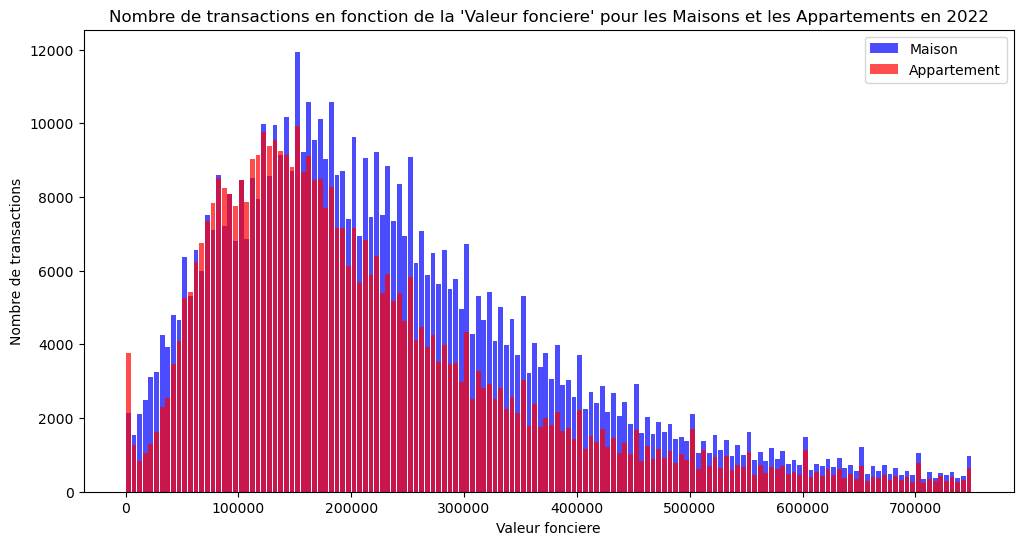

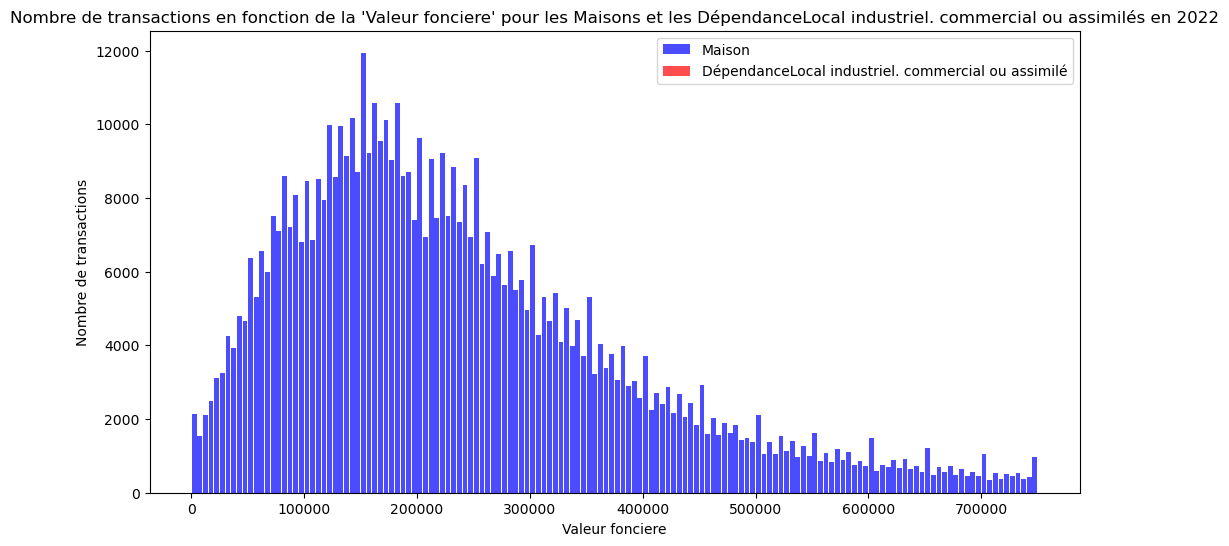

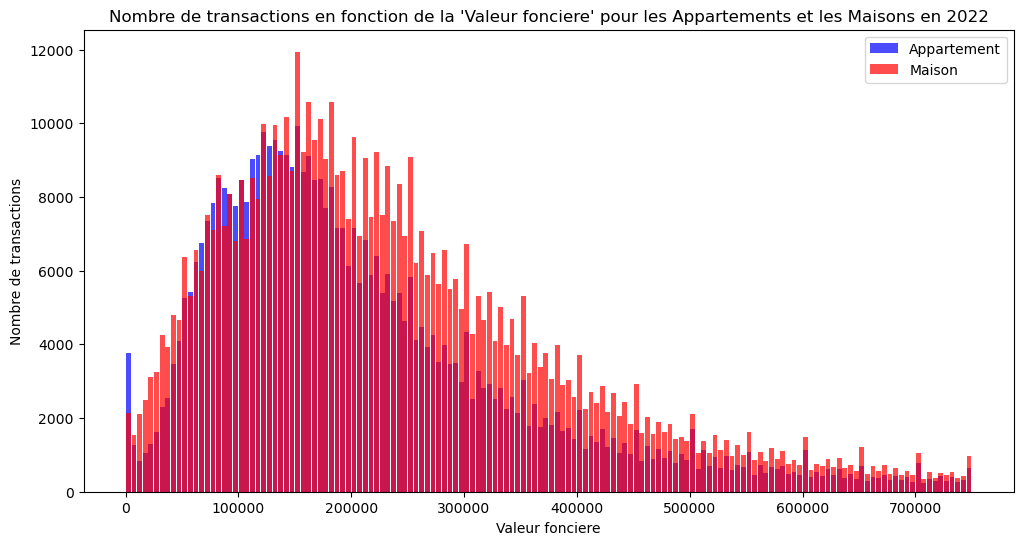

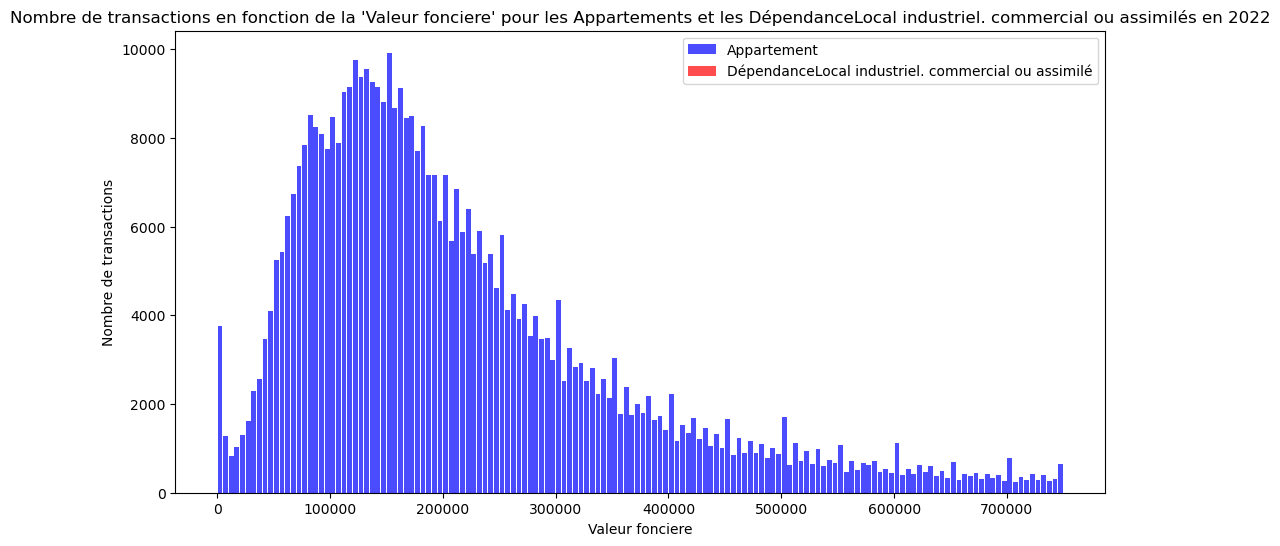

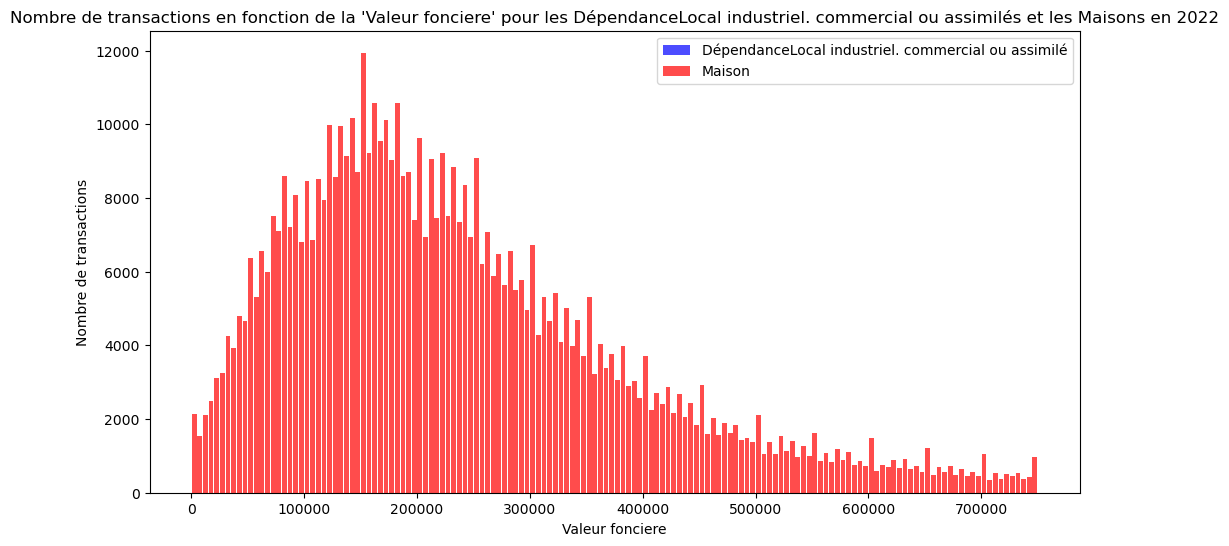

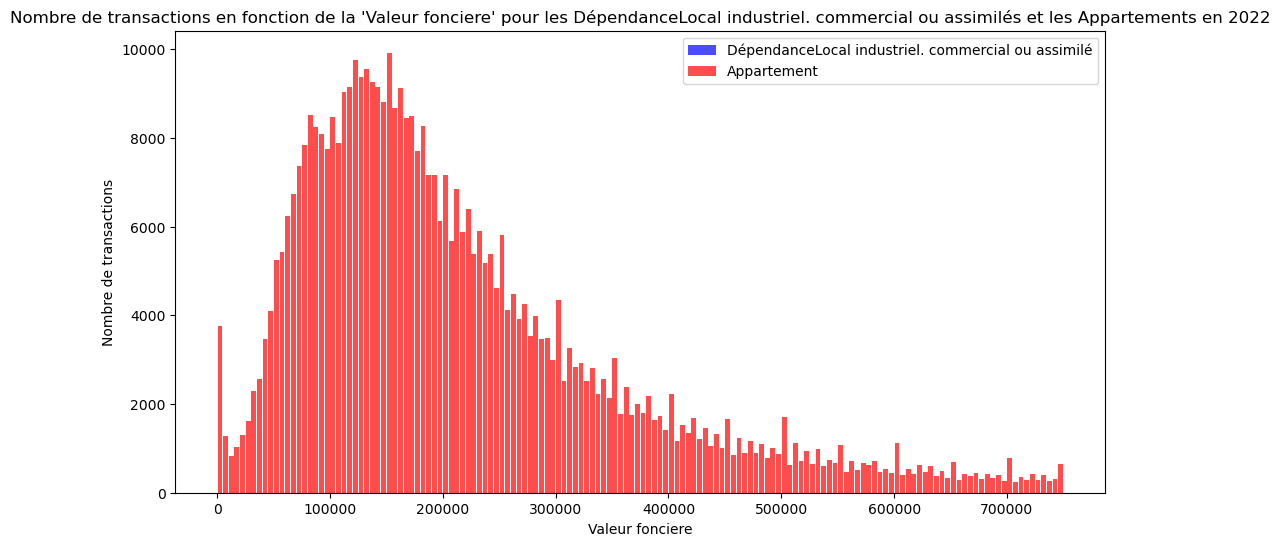

In [6]:
#Ici il faut choisir les variables type_local parmis : 
# 'Maison','Appartement', 'Dépendance', 'Local industriel. commercial ou assimilé'
def comparaison_type_local(année, type_local1, type_local2) : 
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22

    # Filtrer les données pour les appartements et les maisons
    appartements = df[df['Type local'] == type_local1]
    maisons = df[df['Type local'] == type_local2 ]

    # Créer l'histogramme
    plt.figure(figsize=(12, 6))

    # Utiliser le 95e percentile comme valeur maximale pour les intervalles
    max_value = df['Valeur fonciere'].quantile(0.95)
    bins = np.arange(0, max_value + 5000, 5000)

    plt.hist(appartements['Valeur fonciere'], bins=bins, alpha=0.7, color='blue', label=type_local1, rwidth=0.85)
    plt.hist(maisons['Valeur fonciere'], bins=bins, alpha=0.7, color='red', label=type_local2, rwidth=0.85)

    # Ajouter la légende et les étiquettes
    plt.legend()
    plt.xlabel('Valeur fonciere')
    plt.ylabel('Nombre de transactions')
    plt.title(f"Nombre de transactions en fonction de la 'Valeur fonciere' pour les {type_local1}s et les {type_local2}s en {année}")

    # Sauvegarder le graphique dans un fichier image (par exemple, au format PNG)
    plt.savefig(f'transactions_valeur_fonciere_{type_local1}_{type_local2}_{année}.png', dpi=300, bbox_inches='tight')

    # Afficher le graphique
    plt.show()


types_locaux = ['Maison','Appartement', 'Dépendance' 'Local industriel. commercial ou assimilé']
for type_local1 in types_locaux :
    for type_local2 in  types_locaux :
        if type_local1 != type_local2 :
            comparaison_type_local(2022, type_local1, type_local2) 

**CCL :** En 2022, on observe que la majorité des transactions (ventes ou échanges) de maisons et appartements, concerne des biens ayant une valeur foncière comprise entre 130 000€ et 175 000€. 

Aussi, on remarque le volume de ventes/échanges de maisons est supérieur à celui des appartements : cette donnée n'est pas pas surprenante étant donné que près de 7 Français sur 10 vivent dans une maison (cf Insee).



<span style="color:#dec3c3">**Graphe (sur 2022) n° 7** </span>

Distribution de la valeur foncière pour {année}

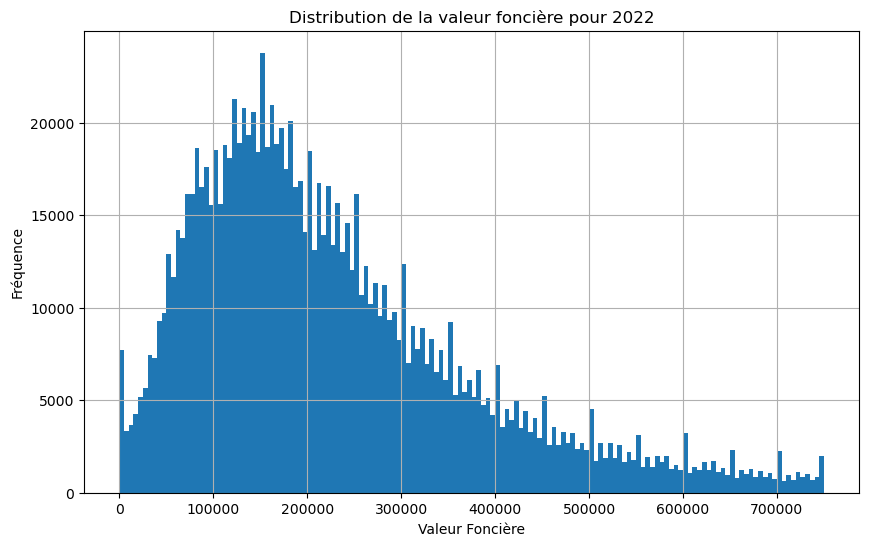

In [7]:
def plot_histogram(année):
    # on choisit le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22


    # On crée l'histogramme
    plt.figure(figsize=(10, 6))
    
    # on utilise le 95e percentile comme valeur maximale pour les intervalles
    max_value = df['Valeur fonciere'].quantile(0.95)
    bins = np.arange(0, max_value + 5000, 5000)
    
    plt.hist(df['Valeur fonciere'], bins=bins)
    plt.xlabel('Valeur Foncière')
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de la valeur foncière pour {année}')
    plt.grid(True)
    plt.show()


plot_histogram(2022)



**CCL :** Ce graphe vient souligner l'observation faite sur les graphes n°1-6, à savoir qu'en 2022, on note que la majorité des biens qui se vendent présentent une valeur foncière comprise entre 100 000€ et 200 000€. 

Ce résultat paraît cohérent au vu des chiffres actuels du marché : le prix médian des maisons actuellement en vente est de 229 000 €, tandis que celui des appartements actuellement en vente est de 200 000 € (cf estimateur immobilier RealAdvisor).
Pour rappel, le prix médian est la valeur centrale de distribution (50% des valeurs se situent en dessous du prix médian et 50% au-dessus).

<span style="color:#dec3c3">**Graphe (sur 2022) n° 8** </span>

HeatMap Nombre de transaction par region en {année}

In [8]:


def transaction_Région_heatmap(année):

    # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22

    transactions_par_region = df.groupby('Code region').size().reset_index(name='Nombre de transactions')

    # chargement des datas geojson pour les régions 
    url_regions_geojson = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions-version-simplifiee.geojson'
    regions_geojson = json.loads(requests.get(url_regions_geojson).text)

    # Création d'une map centrée sur la france 
    map = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

    # créations d'un dico de transaction par région 
    transactions_dict = transactions_par_region.set_index('Code region')['Nombre de transactions']

    # fonction pour avoir les transactions par régions 
    def get_transactions(code_region):
        return transactions_dict.get(str(code_region), 'Données non disponibles')

    # Création d'un Choropleth avec les données et le survol de souris 
    folium.Choropleth(
        geo_data=regions_geojson,
        name='choropleth',
        data=transactions_par_region,
        columns=['Code region', 'Nombre de transactions'],
        key_on='feature.properties.code',
        fill_color='Oranges',
        fill_opacity=0.7,
        line_opacity=0.8,
        legend_name=f'Nombre de transactions par région en {année}',
        title = 'Nombre de transactions par région'
    ).add_to(map)

    # ajout d'infos quand la souris survole une zone 
    info_layer = folium.GeoJson(
        regions_geojson,
        style_function=lambda x: {'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0.1, 'weight': 0.1},
        tooltip=folium.GeoJsonTooltip(fields=['nom', 'code'],
                                    aliases=['Région :', 'Code :'],
                                    labels=True,
                                    sticky=False),
        highlight_function=lambda x: {'weight': 3, 'fillOpacity': 0.6}
    ).add_to(map)

    # affichage de la carte 
    display(map)
    map.save(f"C:\\Users\\Jules\\Documents\\1_Cours\\ESILV\\A3\\S2\\Python\\TD8_9\\affichage\\affichage\\templates\\Nb_transac_par_region_{année}.html")
    #je dois utiliser soit  des doubles backslashes (\\), soit utiliser des slashes normaux (/), car un seul backslash est interprété comme un caractère d'échappement.

transaction_Région_heatmap(2022)

**CCL** : Sans surprise c'est la région Île-de-France qui concentre le plus de transactions. Et ce malgré sa superficie extrêment inférieure à la région Grand-Est par exemple, très en retrait en terme de nombre de transactions.
On observe également que le Sud de la France attire d'avantage de nouveaux acheteurs.


<span style="color:#dec3c3">**Graphe (sur 2022) n° 9** </span>

Boxplot de la "Valeur foncière" par "Type local" en {année}

<Figure size 1000x600 with 0 Axes>

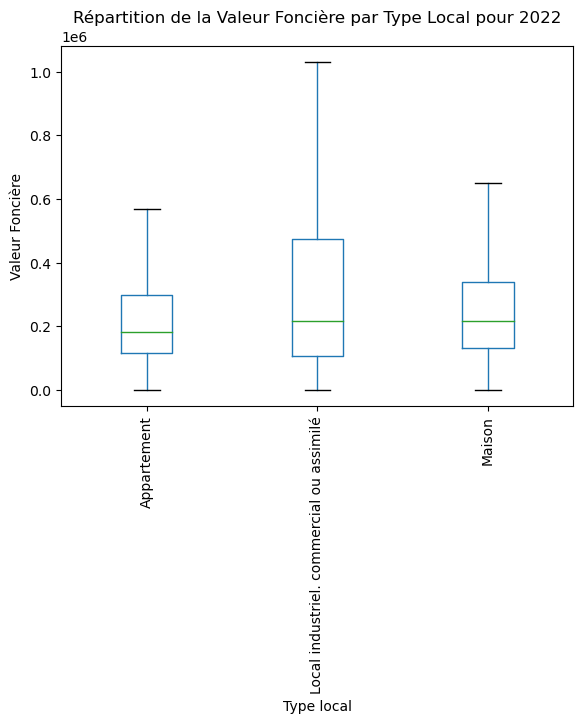

In [9]:
def plot_boxplot(année):
    # choix du dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22

    # Création d boxplot
    plt.figure(figsize=(10, 6))
    df.boxplot(column='Valeur fonciere', by='Type local', grid=False, showfliers=False)
    plt.title(f'Répartition de la Valeur Foncière par Type Local pour {année}')
    plt.suptitle('')  # Supprime le titre automatiquement généré
    plt.ylabel('Valeur Foncière')
    plt.xticks(rotation=90)
    plt.show()

plot_boxplot(2022)
    


**CCL** : On note que ce sont les Locaux industriels, commerciaux ou assimilés dont la valeur foncière a la plus grande variance. Cela est probablement dû au fait qu'ils permettent à leur nu-propriétaire de tirer un revenu fixe soit en les exploitant, soit en louant ou vendant ce droit, à des tiers via des droits aux baux.

 On aurait pu penser que la plus grande variance serait attachée aux maisons dont la valeur peut varier grandement entre un palace parisien et une vieille maison de famille en ruine dans la Creuse, mais il n'en est rien. 


<span style="color:#dec3c3">**Graphe (sur 2022) n° 10** </span>

Nombre de transaction en 2022, par département

In [10]:
def transaction_dep(année) :

     # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22



    transactions_par_departement = df.groupby('Code departement').size().reset_index(name='Nombre de transactions')
    transactions_par_region = df.groupby('Code region').size().reset_index(name='Nombre de transactions')

    # Load GeoJSON data for departments
    url_departements_geojson = 'https://france-geojson.gregoiredavid.fr/repo/departements.geojson'
    departements_geojson = json.loads(requests.get(url_departements_geojson).text)

    # Create a map centered on France
    map = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

    # Create a dictionary of transactions by department
    transactions_dict = transactions_par_departement.set_index('Code departement')['Nombre de transactions']

    # Function to get transactions for a given department
    def get_transactions(code_departement):
        return transactions_dict.get(str(code_departement), 'Données non disponibles')

    # Create a Choropleth with transactions by department and add mouse hover
    folium.Choropleth(
        geo_data=departements_geojson,
        name='choropleth',
        data=transactions_par_departement,
        columns=['Code departement', 'Nombre de transactions'],
        key_on='feature.properties.code',
        fill_color='Oranges',
        fill_opacity=0.7,
        line_opacity=0.8,
        legend_name=f'Nombre de transactions par département en {année}',
        title = 'Nombre de transaction par département'
    ).add_to(map)

    # Add an info layer on hover
    info_layer = folium.GeoJson(
        departements_geojson,
        style_function=lambda x: {'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0.1, 'weight': 0.1},
        tooltip=folium.GeoJsonTooltip(fields=['nom', 'code',],
                                    aliases=['Département :', 'Code :'],
                                    labels=True,
                                    sticky=False),
        highlight_function=lambda x: {'weight': 3, 'fillOpacity': 0.6}
    ).add_to(map)

    # Display the map
    display(map)
    map.save(f"C:\\Users\\Jules\\Documents\\1_Cours\\ESILV\\A3\\S2\\Python\\TD8_9\\affichage\\affichage\\templates\\Nb_transac_par_departement_{année}.html")


transaction_dep(2022)

**CCL** : Cette carte vient soutenir l'observation faite sur le graphe n°8 (nb de transactions par région) : la majorité des transactions en France, se fait à Paris, dans le Nord également, mais surtout aussi dans le Sud (Hérault, Gironde, Alpes-Maritimes). 

La tendance est claire : les transactions sont avant tout polarisées autour de grandes villes dynamiques, telles que Paris, Lilles, Bordeaux, Lyon, Marseilles, Nice ou Toulouse. 

<span style="color:#dec3c3">**Graphe (sur 2022) n° 11** </span>

Distribution du prix au m² en France en {année}


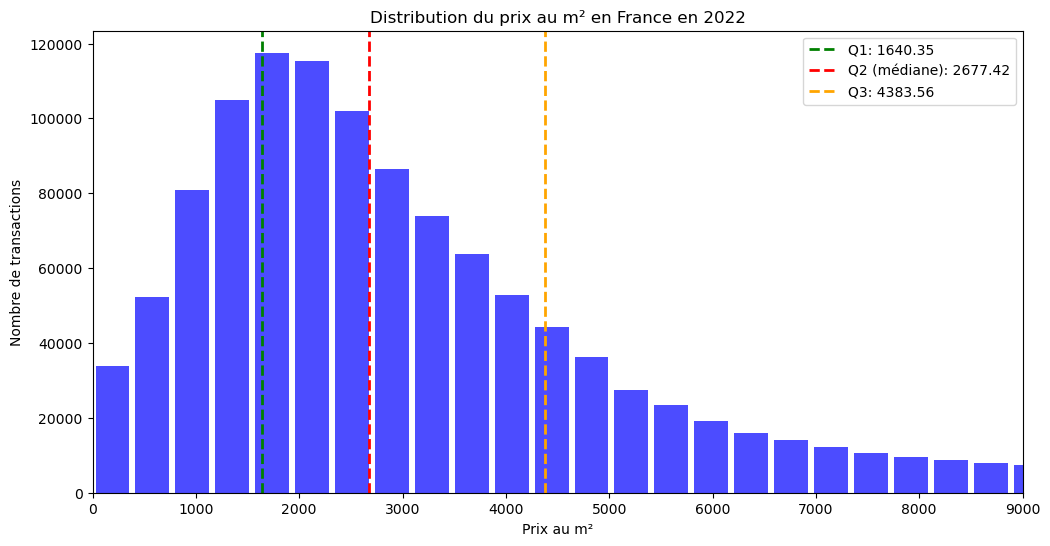

<Figure size 640x480 with 0 Axes>

In [11]:
def repartition_prix_m2(année) :

     # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22

    # Récupérer les prix au m² dans une variable
    prix_m2 = df['Prix m2']

    # Calculer les quartiles
    quartiles = prix_m2.quantile([0.25, 0.5, 0.75])

    # Créer l'histogramme
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.hist(prix_m2, bins=50, color='blue', alpha=0.7, rwidth=0.85)

    # Ajouter les lignes verticales pour les quartiles
    ax.axvline(quartiles[0.25], color='green', linestyle='dashed', linewidth=2, label=f"Q1: {quartiles[0.25]:.2f}")
    ax.axvline(quartiles[0.5], color='red', linestyle='dashed', linewidth=2, label=f"Q2 (médiane): {quartiles[0.5]:.2f}")
    ax.axvline(quartiles[0.75], color='orange', linestyle='dashed', linewidth=2, label=f"Q3: {quartiles[0.75]:.2f}")

    # Ajouter la légende et les étiquettes
    ax.legend()
    ax.set_xlabel('Prix au m²')
    ax.set_ylabel('Nombre de transactions')
    ax.set_title(f'Distribution du prix au m² en France en {année}')
    

    # Définir les limites d'axes personnalisées
    ax.set_xlim(0, 9000)  # Remplacez xmin et xmax par les valeurs de début et de fin souhaitées pour l'axe x

    # Afficher le graphique
    plt.show()
    plt.savefig(f'C:\\Users\\Jules\\Documents\\1_Cours\\ESILV\\A3\\S2\\Python\\TD8_9\\affichage\\affichage\\templates\\Distribution_du_prix_au_m²_en_France_en_{année}.png', dpi=300, bbox_inches='tight')
    
repartition_prix_m2(2022)

**CCL** : La donnée à retenir ici serait la valeur médiane du prix au m² carré en France, en 2022, qui est d'environ 2700€. Ce résultat paraît acceptable : il est quelque peu inférieur aux chiffres du marché actuel (prix moyen du m² : 3100€), sans doute parce que nos données concernent une large variété de biens (dont beaucoup présentaient une surface inférieure à 10m²), et non pas seulement des maisons ou appartements.

Toutefois, il faut noter qu'il est difficile d'interpréter ces chiffres sans prendre en compte certains paramètres (type de bien, localisation en France, type de transaction etc).

<span style="color:#dec3c3">**Graphe (sur 2022) n° 12 à 16** </span>


Affichage du prix moyen du m2 pour la commune de notre choix

In [12]:
def afficher_prix_m2_commune(nom_commune, année):
     # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22
    nom_commune = nom_commune.lower()
    
    if nom_commune == 'paris':
        arrondissements = [' 01', ' 02', ' 03', ' 04', ' 05', ' 06',  ' 07', ' 08', ' 09 ', ' 10' , ' 11', ' 12', ' 13', ' 14', ' 15', ' 16', ' 17', ' 18', ' 19', ' 20']
        commune_data = df[df['Commune'].str.lower().str.startswith(nom_commune) & df['Commune'].str.contains('|'.join(arrondissements))]
    # Filtrer le DataFrame pour la commune spécifiée
    commune_data = df[df['Commune'].str.lower().str.startswith(nom_commune)]
    #la ligne du dessus permet de gérer le cas de Paris
    commune_data = commune_data.dropna(subset=['Valeur fonciere', 'Surface terrain', 'Surface reelle bati'])

    # Filtrer les données avec des valeurs supérieures à 0 pour 'Valeur fonciere' et 'Surface reelle bati'
    commune_data = commune_data[(commune_data['Valeur fonciere'] > 10) & (commune_data['Surface reelle bati'] > 2)]
    commune_data = commune_data[(commune_data['Code type local'] == 2) | (commune_data['Code type local'] == 1) ]
    
    # Calculer le prix moyen du m2 pour la commune
    commune_data['Prix m2'] = commune_data['Valeur fonciere'] / commune_data['Surface reelle bati']
    
    # Filtrer les données pour conserver uniquement celles qui sont inférieures au 90e percentile
    percentile_90 = commune_data['Prix m2'].quantile(0.90)
    commune_data = commune_data[commune_data['Prix m2'] <= percentile_90]
    
    # Calculer le prix moyen du m2 pour la commune après filtrage
    prix_m2_moyen = commune_data['Prix m2'].mean()

    # Obtenir les coordonnées de la commune
    url = f"https://api-adresse.data.gouv.fr/search/?q={nom_commune}&limit=1"
    response = requests.get(url)
    data = response.json()
    coords = data['features'][0]['geometry']['coordinates'][::-1]

    # Créer une carte centrée sur la commune
    m = folium.Map(location=coords, zoom_start=13)

    # Ajouter un marqueur avec le prix moyen du m2
    folium.Marker(
        location=coords,
        popup=f"Prix moyen du m2 pour {nom_commune}: {prix_m2_moyen:.2f} €",
        icon=folium.Icon(color='blue')
    ).add_to(m)
    display (m)
    m.save(f"C:\\Users\\Jules\Documents\\1_Cours\ESILV\A3\S2\Python\TD8_9\\affichage\\affichage\\templates\\Prix_{nom_commune}.html")


# Exemple d'utilisation de la fonction
carte = afficher_prix_m2_commune("Paris ", 2022) 
carte = afficher_prix_m2_commune("Nice", 2022)
carte = afficher_prix_m2_commune("Lyon", 2022)
carte = afficher_prix_m2_commune("Marseille ", 2022)



**CCL** : En comparant nos résultats avec les données de divers sites fiables d'estimation immoblière, il semblerait que nos résultats soient assez fidèles aux prix actuels. 

Pour Paris par exemple, nous observons un prix du m² valant en moyenne 9400€ : il s'agit d'un résultat très proche du prix moyen actuel, qui vaut presque 10 100€ (pour les appartements). 

Avant d'arriver à ces résultats, les divergences de prix nous ont amené à modifier de multiples fois notre fonction : en changeant la façon dont les villes étaient reconnues, et en modifiant le nettoyage de nos données. Mais le problème subsite quelque peu.

In [13]:
Paris = df22[df22['Commune'].str.lower().str.startswith('paris')]
display(Paris['Commune'])



795319     PARIS-L HOPITAL
796182     PARIS-L HOPITAL
798087     PARIS-L HOPITAL
938537             PARISOT
938657             PARISOT
                ...       
1200201           PARIS 15
1200202           PARIS 16
1200203           PARIS 15
1200204           PARIS 14
1200205           PARIS 15
Name: Commune, Length: 39823, dtype: object

<span style="color:#dec3c3">**Graphe (sur 2022) n° 17 + 17 bis (soyons généreux)** </span>

Évolution de la 'Valeur foncière' médiane en fonction du mois en {année}

In [14]:

import datetime
import plotly.graph_objs as go
import plotly.io as pio
def valeur_fonciere_mediane(année): 
     # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22
    # Convert the 'Date de mutation' column to datetime data type
    df['Date mutation'] = pd.to_datetime(df['Date mutation'])

    # Calculate the month for each 'Date de mutation'
    df['Mois'] = df['Date mutation'].apply(lambda x: x.strftime('%Y-%m'))

    # Group data by month and calculate the median of 'Valeur foncière' for each month
    valeur_fonciere_par_mois = df.groupby('Mois')['Valeur fonciere'].median().reset_index()

    # Sort the DataFrame by month
    valeur_fonciere_par_mois = valeur_fonciere_par_mois.sort_values('Mois')

    # Convert the month number to month name
    valeur_fonciere_par_mois['Mois'] = valeur_fonciere_par_mois['Mois'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m').strftime('%Y-%B'))

    # Create a bar chart using Plotly
    fig = go.Figure(go.Bar(x=valeur_fonciere_par_mois['Mois'], y=valeur_fonciere_par_mois['Valeur fonciere'], marker=dict(color=valeur_fonciere_par_mois['Valeur fonciere'], colorscale='Viridis')))

    # Set the title and axis labels
    fig.update_layout(title="Évolution de la 'Valeur foncière' médiane en fonction du mois", xaxis_title='Mois', yaxis_title='Valeur fonciere médiane')

    # Save the figure as an interactive HTML file
    display (fig)
    pio.write_html(fig, file=f'C:\\Users\\Jules\\Documents\\1_Cours\\ESILV\\A3\\S2\\Python\\TD8_9\\affichage\\affichage\\templates\\graphique_valeur_fonciere_mediane_{année}.html', auto_open=True)

valeur_fonciere_mediane(2022)



def valeur_fonciere_moyenne(année): 
     # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22
    # Convert the 'Date de mutation' column to datetime data type
    df['Date mutation'] = pd.to_datetime(df['Date mutation'])

    # Calculate the month for each 'Date de mutation'
    df['Mois'] = df['Date mutation'].apply(lambda x: x.strftime('%Y-%m'))

    # Group data by month and calculate the median of 'Valeur foncière' for each month
    valeur_fonciere_par_mois = df.groupby('Mois')['Valeur fonciere'].mean().reset_index()

    # Sort the DataFrame by month
    valeur_fonciere_par_mois = valeur_fonciere_par_mois.sort_values('Mois')

    # Convert the month number to month name
    valeur_fonciere_par_mois['Mois'] = valeur_fonciere_par_mois['Mois'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m').strftime('%Y-%B'))

    # Create a bar chart using Plotly
    fig = go.Figure(go.Bar(x=valeur_fonciere_par_mois['Mois'], y=valeur_fonciere_par_mois['Valeur fonciere'], marker=dict(color=valeur_fonciere_par_mois['Valeur fonciere'], colorscale='Viridis')))

    # Set the title and axis labels
    fig.update_layout(title="Évolution de la 'Valeur foncière' médiane en fonction du mois", xaxis_title='Mois', yaxis_title='Valeur fonciere médiane')

    # Save the figure as an interactive HTML file
    display (fig)
    pio.write_html(fig, file=f'C:\\Users\\Jules\\Documents\\1_Cours\\ESILV\\A3\\S2\\Python\\TD8_9\\affichage\\affichage\\templates\\graphique_valeur_fonciere_moyenne_{année}.html', auto_open=True)

valeur_fonciere_moyenne(2022)

C:\Users\Jules\AppData\Local\Temp\ipykernel_22104\2373932991.py:17: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date mutation'] = pd.to_datetime(df['Date mutation'])


**CCL** : On observe un léger pic en Juillet et Août. Il est probable que des personnes déménagent durant cette période, qui est faste si l'on a des enfants qui ne sont alors pas obligés de changer d'école en milieu d'année scolaire. 

<span style="color:#dec3c3">**Graphe (sur 2022) n° 18 et n° 19** </span>

Fréquence de chaque Type de Transaction pour {année}

Fréquence de chaque Type de Transaction pour {année} (échelle logarithmique)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


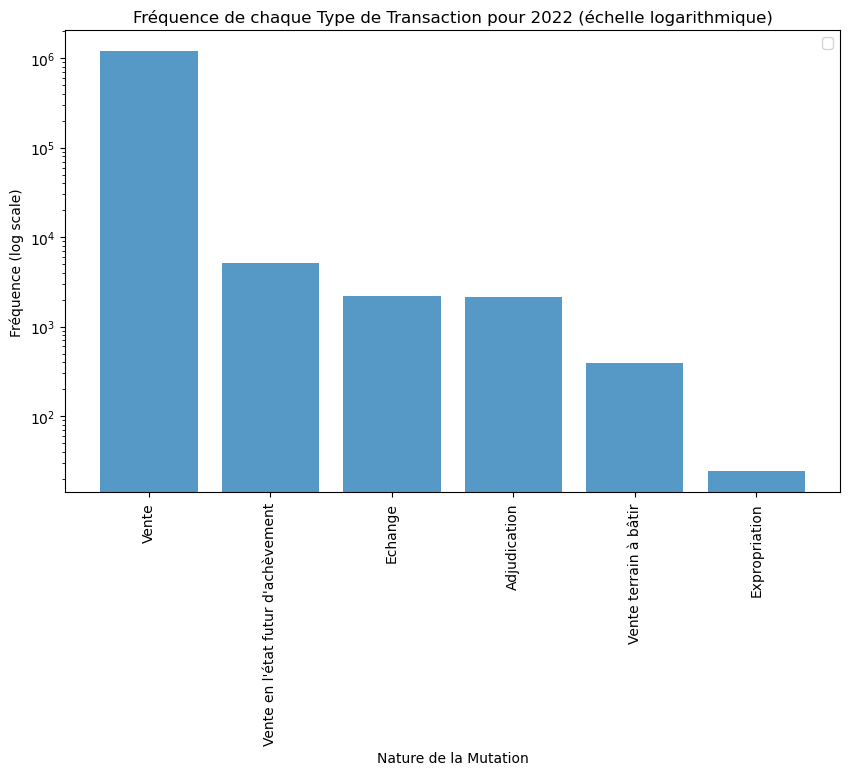

<Figure size 640x480 with 0 Axes>

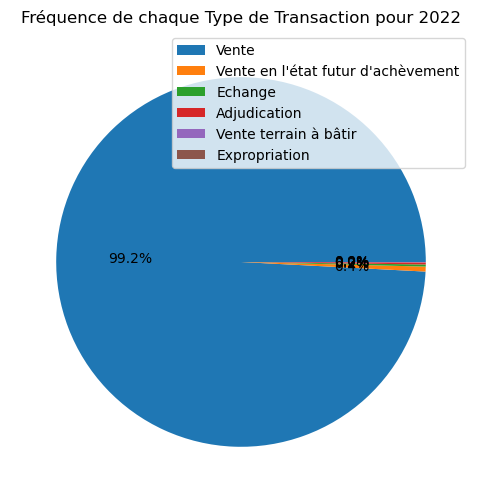

<Figure size 640x480 with 0 Axes>

In [15]:
def plot_bar_chart(année):
    # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22

    # Comptez la fréquence de chaque type de transaction
    mutation_counts = df['Nature mutation'].value_counts()

    # Créez le diagramme à barres
    plt.figure(figsize=(10, 6))
    plt.bar(mutation_counts.index, mutation_counts.values, alpha=0.75, log=True)  # Ajouter l'échelle logarithmique
    plt.xlabel('Nature de la Mutation')
    plt.ylabel('Fréquence (log scale)')
    plt.title(f'Fréquence de chaque Type de Transaction pour {année} (échelle logarithmique)')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()
    plt.savefig(f'C:\\Users\\Jules\\Documents\\1_Cours\\ESILV\\A3\\S2\\Python\\TD8_9\\affichage\\affichage\\templates\\Fréquence_de_chaque_Type_de_Transaction_pour_{année}_(log).png', dpi=300, bbox_inches='tight')

def plot_pie_chart(année):
    # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22

    # Comptez la fréquence de chaque type de transaction
    mutation_counts = df['Nature mutation'].value_counts()

    # Créez le diagramme en camembert
    plt.figure(figsize=(10, 6)) 
    plt.pie(mutation_counts.values, autopct='%1.1f%%') 
    plt.title(f'Fréquence de chaque Type de Transaction pour {année}')
    plt.legend(labels = mutation_counts.index)
    plt.show()
    plt.savefig(f'C:\\Users\\Jules\\Documents\\1_Cours\\ESILV\\A3\\S2\\Python\\TD8_9\\affichage\\affichage\\templates\\Fréquence_de_chaque_Type_de_Transaction_pour_{année}.png', dpi=300, bbox_inches='tight')
          


plot_bar_chart (2022)
plot_pie_chart(2022)

**CCL** : Ce graphe nous est utile pour mieux comprendre la nature des transactions que l'on étudie, ainsi que la contribution de chaque type de transaction.

L'écrasante majorité des transactions effectuées sont en réalité des ventes  : près de 100x plus nombreuses que tout autre type de transaction. Pour observer cet écart plus en détail nous avons choisi d'opter pour une seconde vue en échelle logarithmique.

<span style="color:#dec3c3">**Graphe (sur 2022) n°20** </span>

Histogramme du "Nombre de pièces principales" pour comprendre la distribution du nombre de pièces.


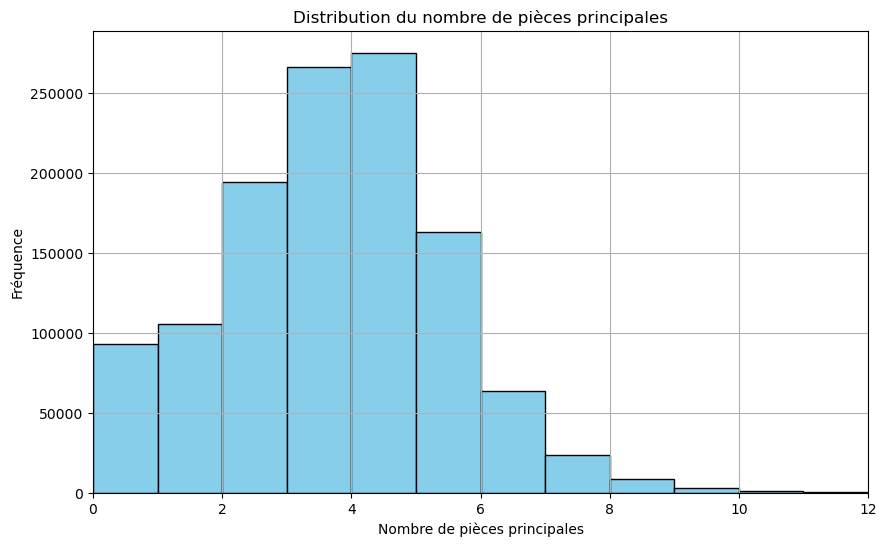

In [16]:
def nb_pièces_principales(année):
    # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22


    plt.figure(figsize=(10,6))
    plt.hist(df['Nombre pieces principales'], bins=90, color='skyblue', edgecolor='black')
    plt.xlabel('Nombre de pièces principales')
    plt.ylabel('Fréquence')
    plt.title('Distribution du nombre de pièces principales')
    plt.grid(True)
    plt.xlim(0,12)
    plt.show()

nb_pièces_principales(2022)



**CCL** : On remarque que la majorité des biens en vente proposent 4 pièces principales (qu'on peut imaginer comme étant une cuisine, une pièce à vivre, une chambre et une salle de bains). 

On note également la quantité non négligeable des biens n'ayant qu'une à deux pièces principales : près de 200 000 appartements que l'on pourrait donc qualifier de studios (ou alors de très petites maisons). 


<span style="color:#dec3c3">**Graphe (sur 2022) n° 21 ** </span>


Diagramme à barres du nombre de transactions par "Code postal" pour voir les zones les plus actives en {année}

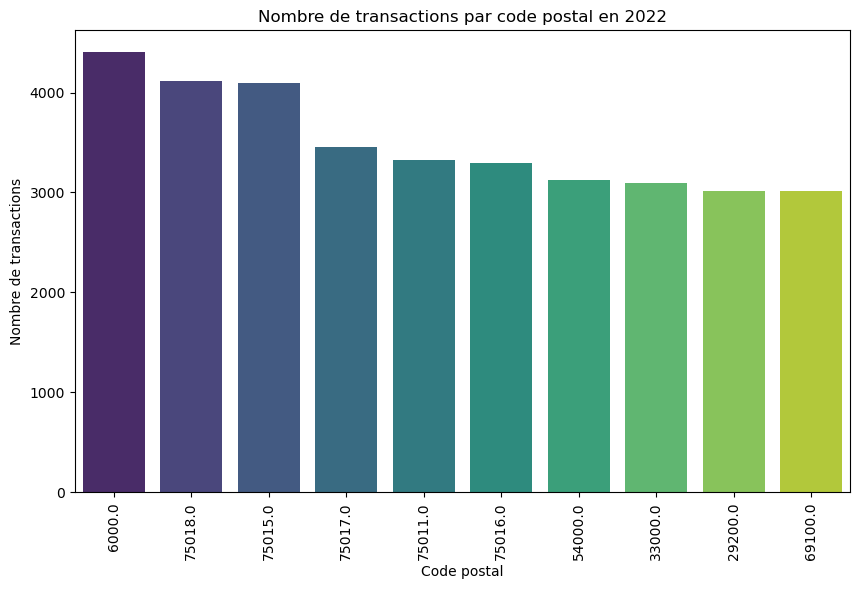

In [17]:
def nb_transaction_code_postal(année):
    # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22

    postal_counts = df['Code postal'].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=postal_counts.index, y=postal_counts.values, palette='viridis')
    plt.xlabel('Code postal')
    plt.ylabel('Nombre de transactions')
    plt.title(f'Nombre de transactions par code postal en {année}')
    plt.xticks(rotation=90)
    plt.show()

nb_transaction_code_postal(2022)

**CCL** : Il nous est intéressant de comparer sur cet histogramme la quantité de transactions dans certains arrondissements de Paris (75 0XX), face à d'autres départements/villes. 

On note ici que le 18e arrondissement de Paris concentre à lui tout seul presque autant de ventes que les villes de l'Oise (60000, Beauvais par ex). De la même manière, le 16e arrondissement surpasse le nombre de ventes de Nancy (54000) ou encore de Bordeaux (33000), qui est pourtant une grande métropole.

<span style="color:#dec3c3">**Graphe (sur 2022) n° 22** </span>

Boxplot du "Nombre de pièces principales" par "Type local" pour voir comment le nombre de pièces varie avec le type de propriété.

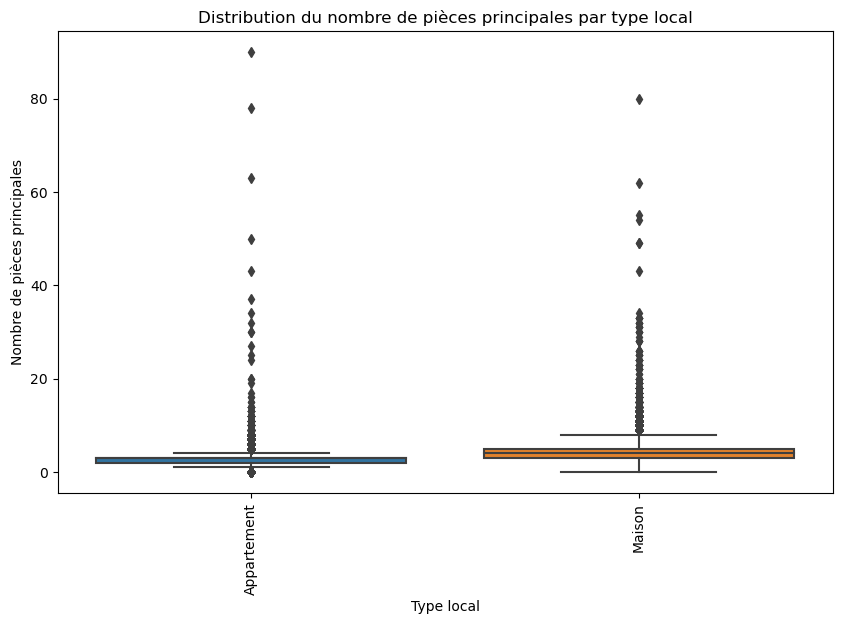

In [18]:
def nb_pièces_principales_type_local(année):
    # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22
    df = df[df['Type local'].isin(['Maison', 'Appartement'])]
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Type local', y='Nombre pieces principales', data=df)
    plt.xlabel('Type local')
    plt.ylabel('Nombre de pièces principales')
    plt.title('Distribution du nombre de pièces principales par type local')
    plt.xticks(rotation=90)
    plt.show()
nb_pièces_principales_type_local(2022)


**CCL** : Les maisons ont en moyenne plus de pièces principales que les appartements. Un grand nombre d'entre elles atteignent même la trentaine (de pièces principales) : il s'agit là de cas marginaux, qu'on pourrait imaginer comme étant des manoirs, châteaux ou villas.

<span style="color:#dec3c3">**Graphe (sur 2022) n° 23** </span>

Transactions par Nature de la mutation et Type local

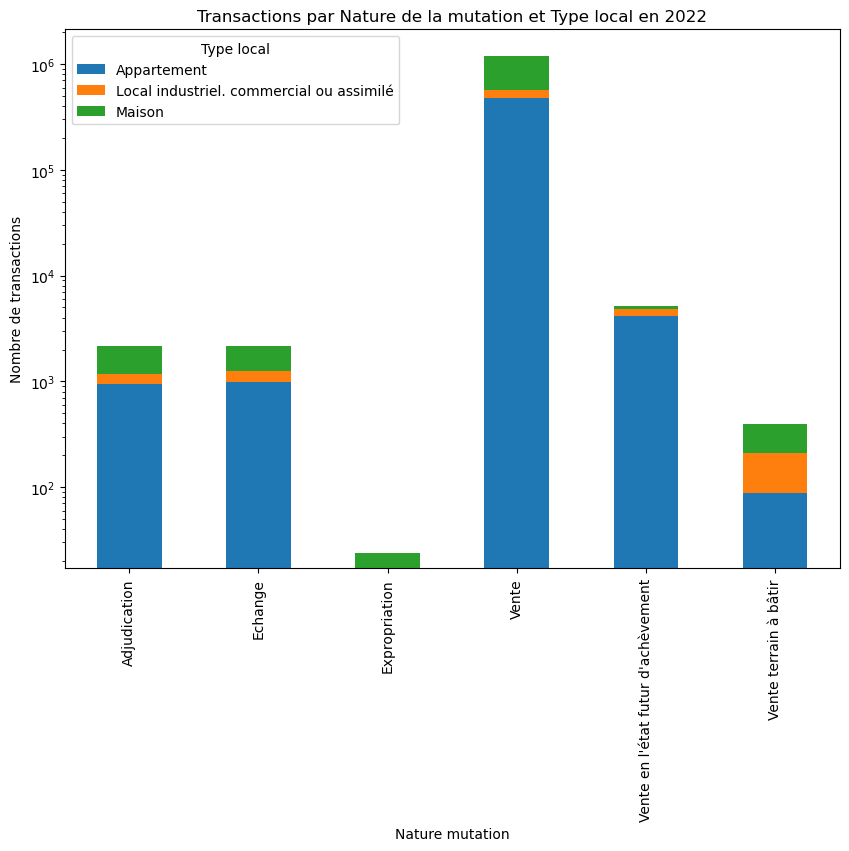

In [19]:


def nature_mutation_type_local(année):
    # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22
    # Créer une table pivot pour le diagramme à barres empilé
    pivot_df = df.pivot_table(index='Nature mutation', columns='Type local', aggfunc='size', fill_value=0)

    # Créer le diagramme à barres empilé
    pivot_df.plot(kind='bar', stacked=True, figsize=(10,7))
    plt.ylabel('Nombre de transactions')
    plt.title(f'Transactions par Nature de la mutation et Type local en {année}')
    
    # Définir l'échelle logarithmique sur l'axe y
    plt.yscale('log')
    
    plt.show()

nature_mutation_type_local(2022)


<span style="color:#dec3c3">**Graphe (sur 2022) n° 24** </span>

Distribution du Prix du m2

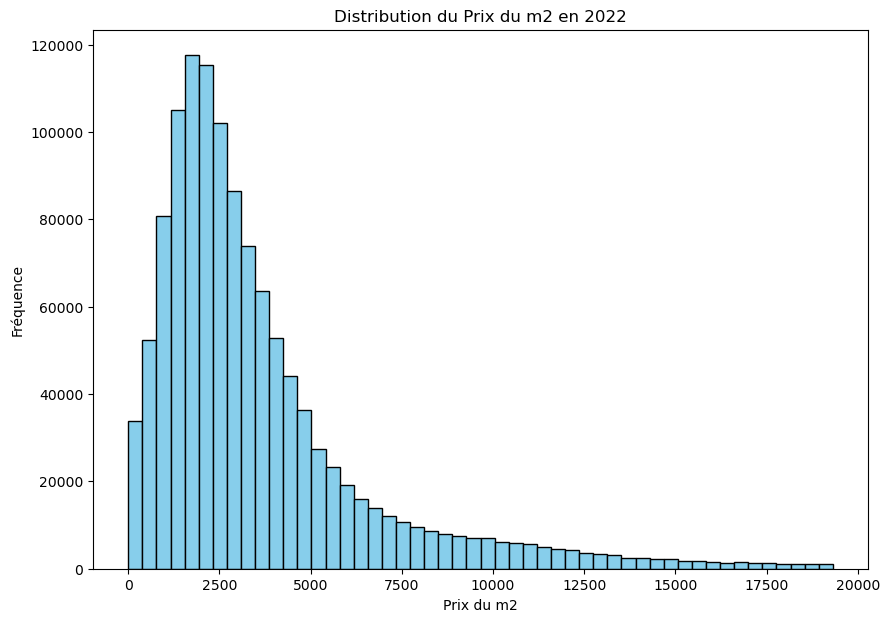

In [20]:
def distribution_prix_m2(année):
    # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22

    # Créer l'histogramme
    plt.figure(figsize=(10,7))
    plt.hist(df['Prix m2'], bins=50, color='skyblue', edgecolor='black')
    plt.xlabel('Prix du m2')
    plt.ylabel('Fréquence')
    plt.title(f'Distribution du Prix du m2 en {année}')
    plt.show()

distribution_prix_m2(2022)


**CCL** : Cet histogramme vient soutenir notre interprétation du graphe n°11, à savoir que la valeur médiane du prix au m² carré en France, en 2022, serait d'environ 2700€. 

Ce résultat semble cohérent avec les prix actuels : une rapide recherche nous apprend que le pix du m² médian des maisons (558 435 ventes) est de 1990€, contre 3300€ pour les appartements (429 410 ventes). (cf immobilier.notaires.fr)

Toutefois, il faut noter qu'il est difficile d'interpréter ces chiffres sans prendre en compte certains paramètres (type de bien, région/ville de France, type de transaction etc).

<span style="color:#dec3c3">**Graphe (sur 2022) n° 25** </span>

Prix du m2 contre Nombre de pièces principales en {année}


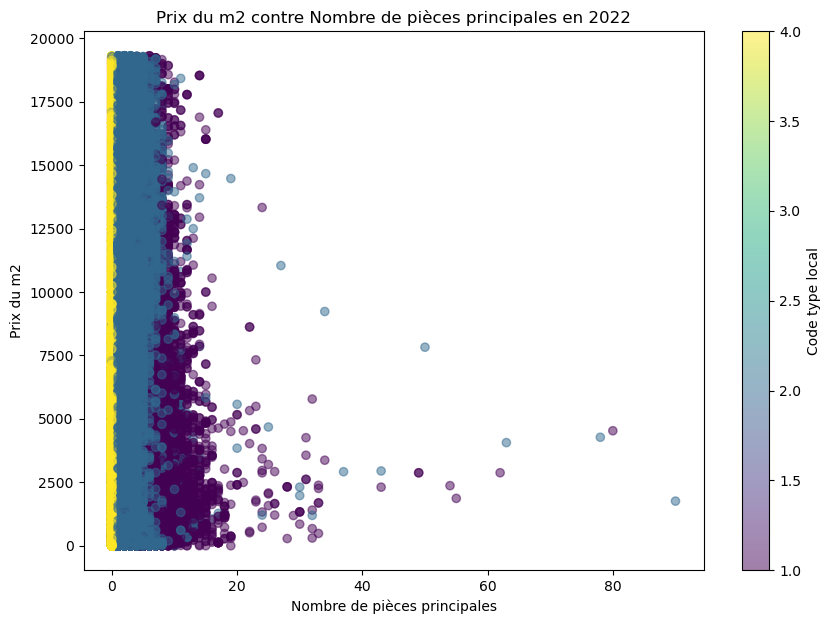

In [21]:


def prix_m2_nb_pieces_principales(année):
    # Choix du dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22

    # Céation du diagramme de dispersion avec une légende pour la couleur
    plt.figure(figsize=(10,7))
    scatter = plt.scatter(df['Nombre pieces principales'], df['Prix m2'], alpha=0.5, c=df['Code type local'], cmap='viridis')
    plt.xlabel('Nombre de pièces principales')
    plt.ylabel('Prix du m2')
    plt.title(f'Prix du m2 contre Nombre de pièces principales en {année}')
    
    # Ajout de  la légende
    cbar = plt.colorbar(scatter)
    cbar.set_label('Code type local')
    
    plt.show()

prix_m2_nb_pieces_principales(2022)


**CCL** : En mauve sont représentées les maisons, et en bleu les appartements. On observe de nouveau que les maisons ont, en général, bien plus de pièces principales que les appartements, ce qui est logique en termes d'espace disponible. 

On observe aussi des points plus foncés, signe qu'il reste des duplicats.

<span style="color:#dec3c3">**Graphe (sur 2022) n° 26** </span>

Prix moyen du m2 par département

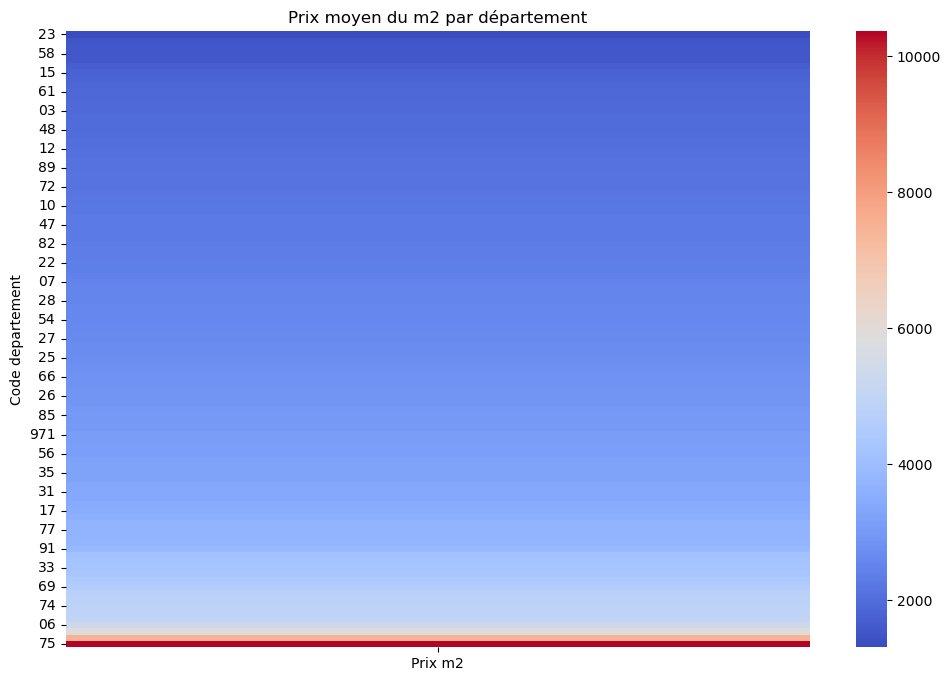

In [22]:


def prix_m2_dep(année):
    # Choix du dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22

    # Créer une table pivot pour la carte de chaleur
    pivot_df = df.pivot_table(index='Code departement', values='Prix m2', aggfunc='mean')

    # Trier le DataFrame par les prix moyens du m2
    pivot_df = pivot_df.sort_values(by='Prix m2')

    # Créer la carte de chaleur
    plt.figure(figsize=(12,8))
    sns.heatmap(pivot_df, cmap='coolwarm')
    plt.title('Prix moyen du m2 par département')
    plt.show()

prix_m2_dep(2022)


**CCL** : Le prix du m² à Paris Intramuros est bien supérieur à celui de tous les autres départements (on avoisine les 10 000€, comme mentionné précédemment).

A son extrême opposé, le 23 : La Creuse. Pour le prix d'un 20 m² parisien, on peut, en moyenne, s'offrir 100 m² dans la Creuse. Une perspective qui fait réfléchir à l'ère du télétravail.

<span style="color:#dec3c3">**Graphe (sur 2022) n° 27** </span>

Prix moyen du m2 par département en {année}

In [23]:
def prix_m2_dep(année):
    # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22

    # Calculer la moyenne des prix du m2 par département
    moyenne_prix_m2_par_departement = df.groupby('Code departement')['Prix m2'].mean().reset_index()

    # Load GeoJSON data for departments
    url_departements_geojson = 'https://france-geojson.gregoiredavid.fr/repo/departements.geojson'
    departements_geojson = json.loads(requests.get(url_departements_geojson).text)

    # Create a map centered on France
    map = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

    # Create a Choropleth with average prices by department
    folium.Choropleth(
        geo_data=departements_geojson,
        name='choropleth',
        data=moyenne_prix_m2_par_departement,
        columns=['Code departement', 'Prix m2'],
        key_on='feature.properties.code',
        fill_color='Blues',
        fill_opacity=0.7,
        line_opacity=0.8,
        legend_name=f'Prix moyen du m2 par département en {année}',
        title='Prix moyen du m2 par département'
    ).add_to(map)

    # Add an info layer on hover
    info_layer = folium.GeoJson(
        departements_geojson,
        style_function=lambda x: {'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0.1, 'weight': 0.1},
        tooltip=folium.GeoJsonTooltip(fields=['nom', 'code'],
                                      aliases=['Département :', 'Code :'],
                                      labels=True,
                                      sticky=False),
        highlight_function=lambda x: {'weight': 3, 'fillOpacity': 0.6}
    ).add_to(map)

    # Display the map
    display(map)
    map.save(f"C:\\Users\\Jules\\Documents\\1_Cours\\ESILV\\A3\\S2\\Python\\TD8_9\\affichage\\affichage\\templates\\prixm2_par_departement_{année}.html")

prix_m2_dep(2022)


**CCL** : Cette carte vient soutenir l'observation faite sur le graphe n°10 (nb de transactions par département) : l'élévation du prix moyen au m² est localisé aux mêmes points chauds de transactions, c'est-à-dire surtout à Paris, dans le Nord également, mais surtout aussi dans le Sud (Hérault, Gironde, Alpes-Maritimes). 

La tendance est claire : une corrélation se dessine entre le prix moyen du m² et sa localisation stratégique. De même que les transactions, les prix les plus élevés sont avant tout polarisés autour de grandes villes dynamiques, telles que Paris, Lilles, Bordeaux, Lyon, Marseilles, Nice ou Toulouse. 

On  note en particulier les prix exorbitants pratiqués à Paris et dans sa petite couronne (Hauts-de-Seine, pour ne pas citer Neuilly-sur-Seine).

<span style="color:#dec3c3">**Graphe (sur 2022) n° 28** </span>


Heatmap : prix du m2 par région en {année}


In [24]:
def prix_m2_région(année):
    # Choisissez le dataframe en fonction de l'année
    if année == 2018:
        df = df18
    elif année == 2019:
        df = df19
    elif année == 2020:
        df = df20
    elif année == 2021:
        df = df21
    else:
        df = df22

    # Calculer la moyenne des prix du m2 par département
    moyenne_prix_m2_par_region = df.groupby('Code region')['Prix m2'].mean().reset_index()

    # Load GeoJSON data for departments
    url_region_geojson = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions-version-simplifiee.geojson'
    region_geojson = json.loads(requests.get(url_region_geojson).text)

    # Create a map centered on France
    map = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

    folium.Choropleth(
        geo_data=region_geojson,
        name='choropleth',
        data=moyenne_prix_m2_par_region,
        columns=['Code region', 'Prix m2'],
        key_on='feature.properties.code',
        fill_color='Blues',
        fill_opacity=0.7,
        line_opacity=0.8,
        legend_name=f'Prix moyen du m2 par region en {année}',
        title='Prix moyen du m2 par region'
    ).add_to(map)

    info_layer = folium.GeoJson(
        region_geojson,
        style_function=lambda x: {'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0.1, 'weight': 0.1},
        tooltip=folium.GeoJsonTooltip(fields=['nom', 'code'],
                                      aliases=['Région :', 'Code :'],
                                      labels=True,
                                      sticky=False),
        highlight_function=lambda x: {'weight': 3, 'fillOpacity': 0.6}
    ).add_to(map)

    # Display the map
    display(map)
    map.save(f"C:\\Users\\Jules\\Documents\\1_Cours\\ESILV\\A3\\S2\\Python\\TD8_9\\affichage\\affichage\\templates\\prixm2_par_Région_{année}.html")

prix_m2_région(2022)


**CCL** : Une fois encore, on remarque que la France demeure un pays centralisé : l'Île-de-France présente les tarifs du m² les plus élevés.

<span style="color:#dec3c3">**Graphe (comparatif de plusieurs années) n° 1** </span>

Ligne de temps montrant le changement de la "Valeur foncière" moyenne au fil du temps

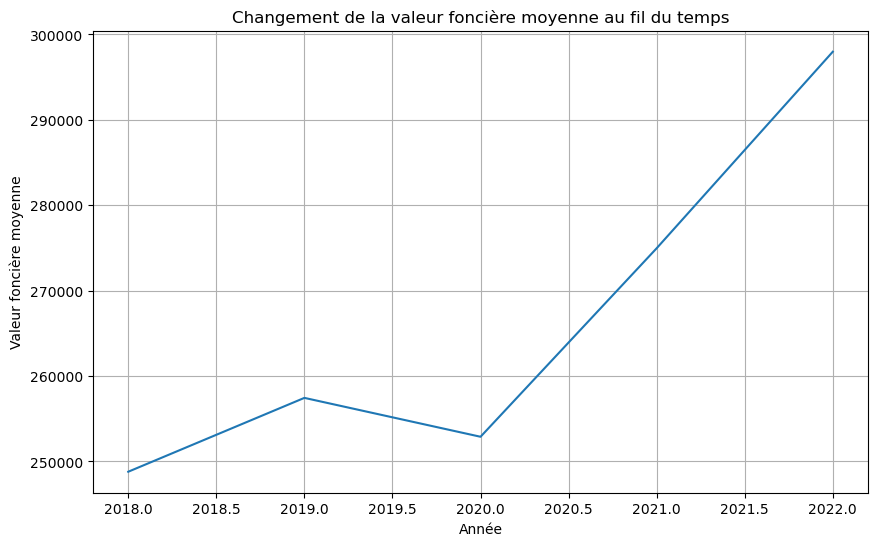

In [25]:


df_list = [df18, df19, df20, df21, df22]
# Créer un dataframe contenant la valeur foncière moyenne pour chaque année
mean_value = [df['Valeur fonciere'].mean() for df in df_list]
année = range(2018, 2023)
df_mean_value = pd.DataFrame({'Année': année, 'Valeur foncière moyenne': mean_value})

# Créer la ligne de temps
plt.figure(figsize=(10, 6))
plt.plot(df_mean_value['Année'], df_mean_value['Valeur foncière moyenne'])
plt.xlabel('Année')
plt.ylabel('Valeur foncière moyenne')
plt.title('Changement de la valeur foncière moyenne au fil du temps')
plt.grid(True)
plt.show()


**CCL** : Une tendance claire se dessine : l'augmentation exponentielle de la valeur foncière après 2020 indique un boom dans l'immbolier à la suite de la pandémie du Covid. 

En effet, la valeur foncière moyenne a augmenté de quasiment 20%, en passant de 255 000€ en 2020 à presque 300 000€ en 2022. 

On pourrait penser que les Français ont décidé d'investir d'avantage dans leur chez-eux, endroit dans lequel ils ont passé le plus clair de leur temps lors des confinements. On pourrait dire que le crise sanitaire a eu pour effet d'accélérer la prise de décision d'achat d'un bien immobilier, nourrie également par des taux très bas.

<span style="color:#dec3c3">**Graphe (comparatif de plusieurs années) n° 2** </span>

Nombre de transactions par nature de la mutation par année

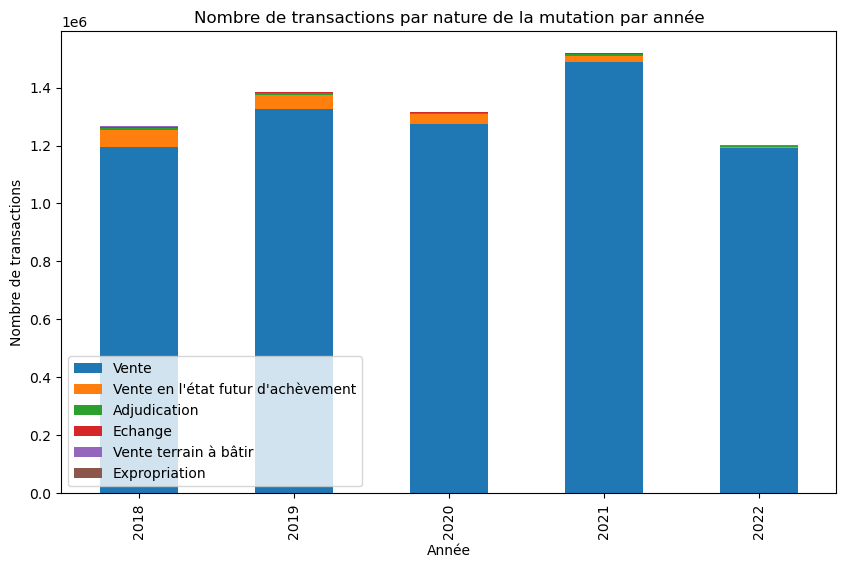

In [26]:
# Créer un dataframe contenant le nombre de transactions par nature de la mutation pour chaque année
df_nature = pd.concat([df['Nature mutation'].value_counts().rename(year) for df, year in zip(df_list, année)], axis=1)

# Créer le diagramme à barres empilées
df_nature.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Année')
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transactions par nature de la mutation par année')
plt.show()


**CCL** : Globalement, on observe que les ventes représentent l'immense majorité des transactions de biens, devant les ventes en l'état futur achèvement et autres mutations. 

On peut remarquer que, progressivement, les ventes en l'état futur achèvement ont diminué, en particulier à partir de 2020 : on pourrait y voir là les conséquences de la pandémie du Covid.

<span style="color:#dec3c3">**Graphe (comparatif de plusieurs années) n° 3** </span>

Évolution de la surface réelle bâti moyenne au fil du temps

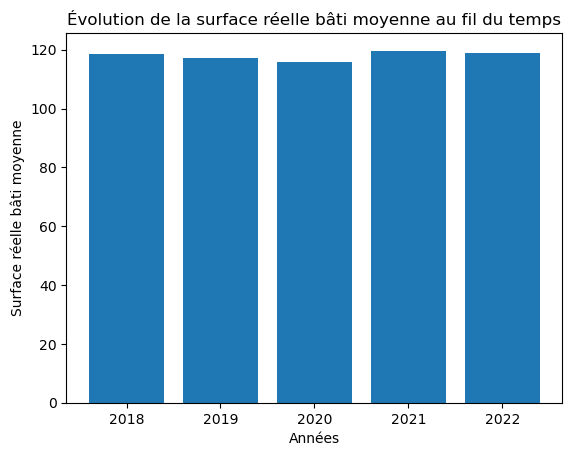

In [27]:
def plot_mean_surface_reelle(année, df_list):
    mean_surfaces = []
    for df in df_list:
        mean_surfaces.append(df['Surface reelle bati'].mean())

    plt.bar(année, mean_surfaces)
    plt.xlabel('Années')
    plt.ylabel('Surface réelle bâti moyenne')
    plt.title('Évolution de la surface réelle bâti moyenne au fil du temps')
    plt.show()

plot_mean_surface_reelle(année, df_list)


**CCL** : La surface réelle bâti moyenne reste constante au fil du temps (sur 5 années) : elle vaut en moyenne 120 m².

<span style="color:#dec3c3">**Graphe (comparatif de plusieurs années) n° 4** </span>

Valeur foncière moyenne par département au fil du temps

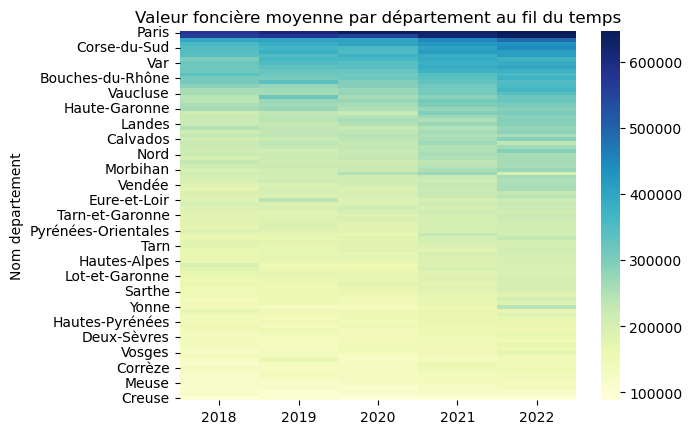

In [28]:
def plot_heatmap_departement(année, df_list):
    departement_values = []
    for df in df_list:
        mean_values = df.groupby('Nom departement')['Valeur fonciere'].mean()
        departement_values.append(mean_values)

    df_departement_values = pd.DataFrame(departement_values, index=année).transpose()

    # Calculer la valeur moyenne sur toutes les années pour chaque département
    mean_over_année = df_departement_values.mean(axis=1)

    # Tri du DataFrame en fonction de cette moyenne
    df_departement_values_sorted = df_departement_values.loc[mean_over_année.sort_values(ascending=False).index]

    sns.heatmap(df_departement_values_sorted, cmap='YlGnBu')
    plt.title('Valeur foncière moyenne par département au fil du temps')
    plt.show()

plot_heatmap_departement(année, df_list)


<span style="color:#dec3c3">**Graphe (comparatif de plusieurs années) n° 5** </span>

Valeur foncière moyenne par département au fil du temps ( Zoom sur le top 20)

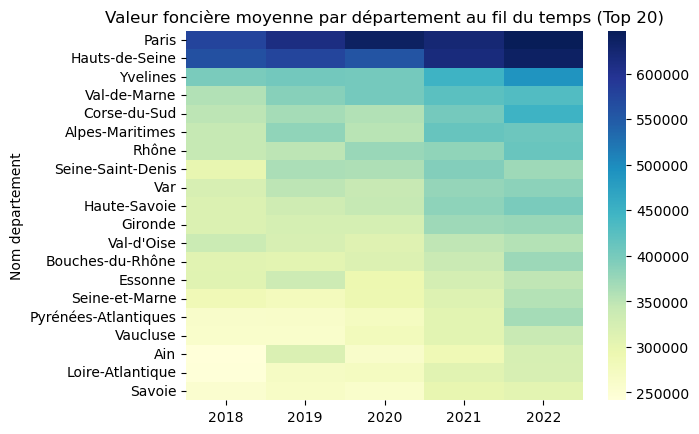

In [29]:
def plot_heatmap_departement(année, df_list):
    departement_values = []
    for df in df_list:
        mean_values = df.groupby('Nom departement')['Valeur fonciere'].mean()
        departement_values.append(mean_values)

    df_departement_values = pd.DataFrame(departement_values, index=année).transpose()

    # Calculer la valeur moyenne sur toutes les années pour chaque département
    mean_over_année = df_departement_values.mean(axis=1)

    # Tri du DataFrame en fonction de cette moyenne
    df_departement_values_sorted = df_departement_values.loc[mean_over_année.sort_values(ascending=False).index]

    # Prendre seulement les 20 premières lignes (Top 20 des départements)
    df_departement_values_sorted = df_departement_values_sorted.head(20)

    sns.heatmap(df_departement_values_sorted, cmap='YlGnBu')
    plt.title('Valeur foncière moyenne par département au fil du temps (Top 20)')
    plt.show()

plot_heatmap_departement(année, df_list)


**CCL** : On remarque à première vue, que l'Île-de-France comprend les départements offrant des biens dont la valeur foncière moyenne est la plus élevée de France. A l'instar de ce que l'on avait observé sur nos cartes, les départements du Sud de la France, comme le Var ou les Alpes-Maritimes, présentent également les biens les plus chers. 

En termes d'évolution, on remarque que une augmentation de la valeur foncière moyenne, illustrée par assombrissement progressif des couleurs (vers la droite), notamment à partir de 2020. 

<span style="color:#dec3c3">**Graphe (comparatif de plusieurs années) n°6** </span>

Valeur foncière moyenne par région au fil du temps

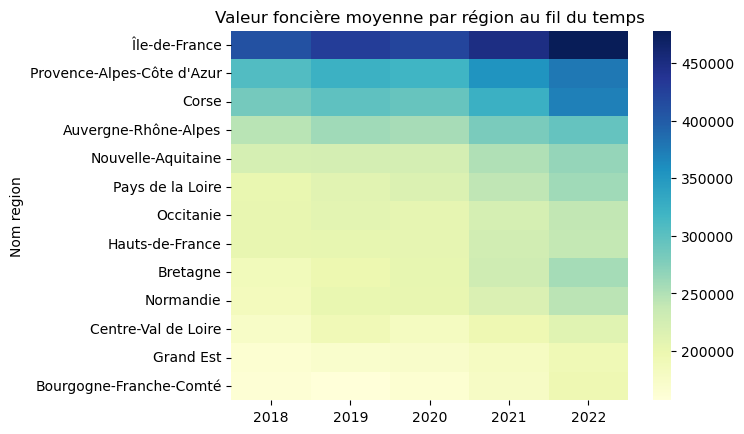

In [30]:

def plot_heatmap_region(année, df_list):
    region_values = []
    for df in df_list:
        mean_values = df.groupby('Nom region')['Valeur fonciere'].mean()
        region_values.append(mean_values)

    df_region_values = pd.DataFrame(region_values, index=année).transpose()

    # Calculer la valeur moyenne sur toutes les années pour chaque région
    mean_over_année = df_region_values.mean(axis=1)

    # Tri du DataFrame en fonction de cette moyenne
    df_region_values_sorted = df_region_values.loc[mean_over_année.sort_values(ascending=False).index]

    sns.heatmap(df_region_values_sorted, cmap='YlGnBu')
    plt.title('Valeur foncière moyenne par région au fil du temps')
    plt.show()

plot_heatmap_region(année, df_list)






<span style="color:#dec3c3">**Graphe (comparatif de plusieurs années) n°7** </span>

Évolution du prix moyen au mètre carré par année

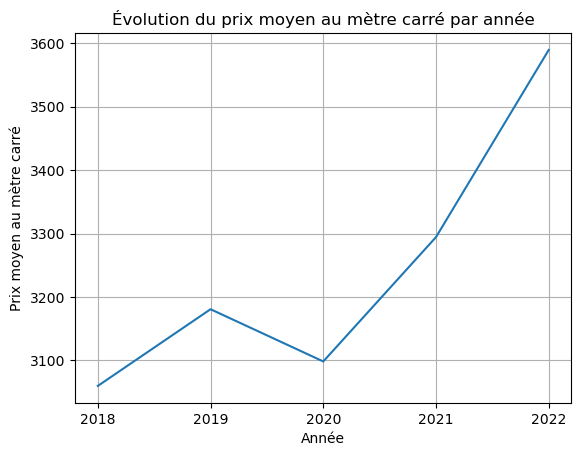

In [31]:
years = [18, 19, 20, 21, 22]
année  = []
average_price_per_m2 = []

for year in years:
    df = globals()['df' + str(year)]
    average_price_per_m2.append(df['Prix m2'].mean())
    année.append('20'+str(year))

plt.plot(année, average_price_per_m2)
plt.xlabel('Année')
plt.ylabel('Prix moyen au mètre carré')
plt.title('Évolution du prix moyen au mètre carré par année')
plt.grid(True)
plt.show()


**CCL** : Ce graphique vient corroborer notre conclusion faite à partir du graphe (comparatif de plusieurs années) n° 1 : on observe une hausse  exponentielle du prix moyen au m², après 2020, indiquant un boom dans l'immbolier à la suite de la pandémie du Covid. 

En effet, la valeur foncière moyenne a augmenté de quasiment 16%, en passant de 3100€ en 2020 à presque 3600€ en 2022. 

On pourrait penser que les Français ont décidé d'investir d'avantage dans leur chez-eux, endroit dans lequel ils ont passé le plus clair de leur temps lors des confinements, et donc que la demande a considérablement augmenté. Les prix de l'immobilier ont donc suivi.

<span style="color:#dec3c3">**Graphe (comparatif de plusieurs années) n°8** </span>

Comparaison du nombre de transactions par année

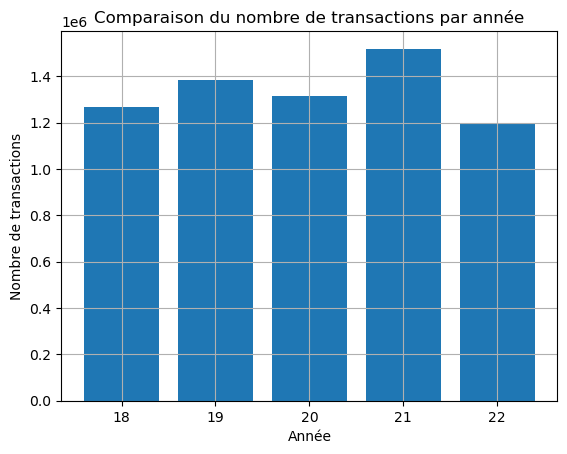

In [32]:
transaction_counts = []

for year in years:
    df = globals()['df' + str(year)]
    transaction_counts.append(df.shape[0])

plt.bar(years, transaction_counts)
plt.xlabel('Année')
plt.ylabel('Nombre de transactions')
plt.title('Comparaison du nombre de transactions par année')
plt.grid(True)
plt.show()


**CCL** : On observe que 2021 a été l'année réalisant le plus de ventes de biens. On peut y voir là la hausse de demandes, en sortie de confinements, mentionnée précédemment (graphes 1 et 7).

<span style="color:#dec3c3">**Graphe (comparatif de plusieurs années) n°9** </span>

Valeur foncière totale par région et par année

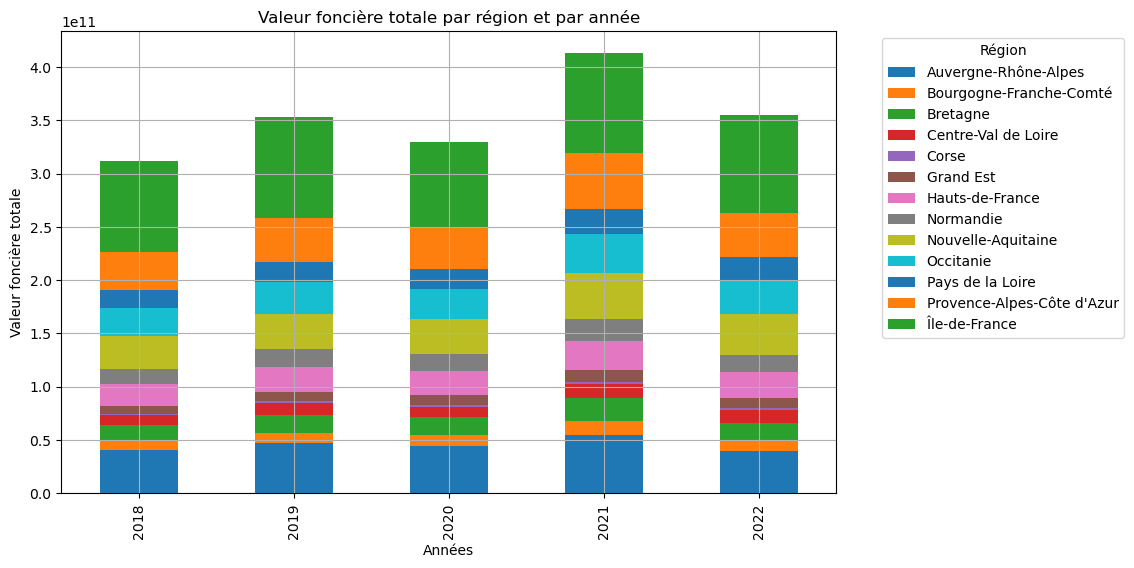

In [33]:
# Créer un dictionnaire pour stocker les valeurs totales pour chaque région et chaque année
total_values_by_region = {}
année = 2018
for df in df_list:
    total_values_by_region[année] = df.groupby('Nom region')['Valeur fonciere'].sum()
    année += 1

# Créer un dataframe à partir du dictionnaire
df_total_values_by_region = pd.DataFrame(total_values_by_region)

# Transposer le dataframe pour avoir les années en colonnes et les régions en index
df_total_values_by_region = df_total_values_by_region.transpose()

# Créer le graphique
df_total_values_by_region.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Années')
plt.ylabel('Valeur foncière totale')
plt.title('Valeur foncière totale par région et par année')
plt.grid(True)
plt.legend(title='Région', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**CCL** : Comme d'habitude, on observe la part écrasante de l'Île-de-France en termes de valeur foncière totale (à ne pas confondre avec la Bretagne, bien inférieure). De même, le Sud de la France maintient sa place dans le top des régions ayant la plus grande part dans la valeur foncière totale : la région PACA et l'Occitanie en sont l'illustration. 
Petite pensée au Grand-Est et à la Corse qui sont très effacées face aux autres régions, et ce, toute année confondues. 

Globalement, la part de chaque région reste constante au fil des années. 

<span style="color:#dec3c3">**Graphe (comparatif de plusieurs années) n°10** </span>

Nombre de différents types de biens muté par année

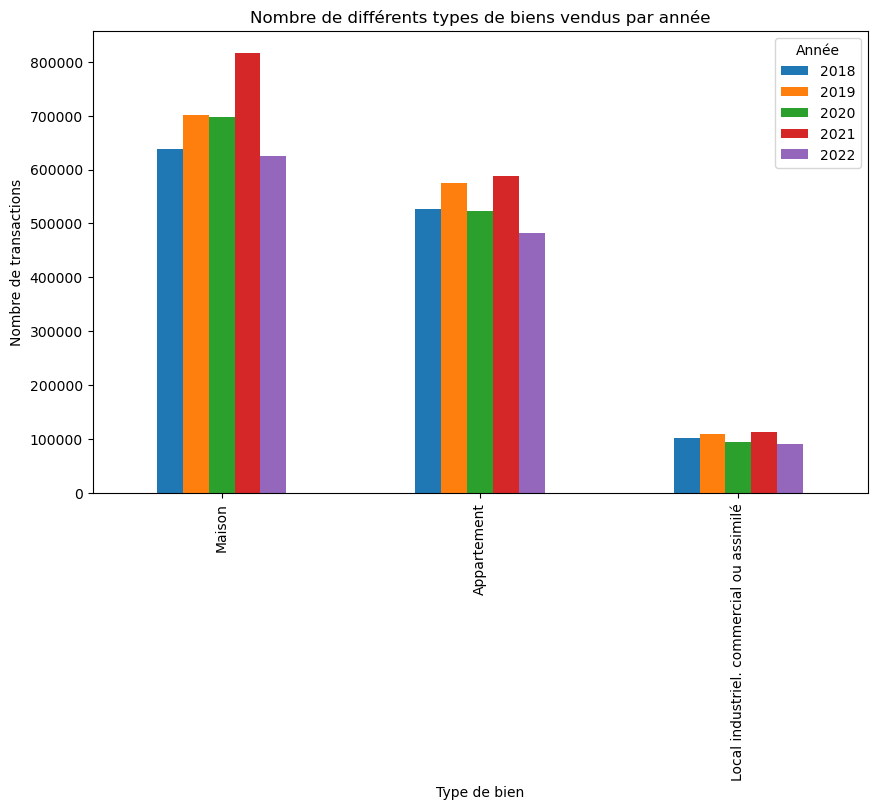

In [34]:
counts_by_type = {}
df_list = [df18, df19, df20, df21, df22]
current_année = 2018
for df in df_list :
    counts_by_type[current_année] = df['Type local'].value_counts()
    current_année += 1  # Change 'année' to 'current_année'

# Créer un dataframe à partir du dictionnaire
df_counts_by_type = pd.DataFrame(counts_by_type)

# Créer le graphique
df_counts_by_type.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Type de bien')
plt.ylabel('Nombre de transactions')
plt.title('Nombre de différents types de biens vendus par année')
plt.grid(False)
plt.legend(title='Année')
plt.show()


**CCL** : Pour tous biens confondus, on remarque en 2021 une hausse des achats, en particulier des maisons (qui traduit la hausse de demandes des Français à la fin des confinements). 

L'année de 2022 semble avoir été un peu moins fructueuse que les précédentes, sans doute dû aux diverses crises rencontrées (la guerre en Ukraine par exemple, qui a eu un impact direct sur notre économie).

De manière générale, les maisons sont les biens les plus vendus et donc recherchés par les Français.